In [11]:
# Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import warnings

In [13]:
warnings.filterwarnings('ignore')
stemmer = nltk.SnowballStemmer('english')
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Pavithra
[nltk_data]     Jayan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [16]:
data = pd.read_excel('war_tweets.xls')

In [17]:
data.head()

id      conversation_id               created_at  \
0  1504325620976819968  1504082706598139904  2022-03-17 05:15:51 UTC   
1  1504325620179909888  1504323038044509952  2022-03-17 05:15:51 UTC   
2  1504325618829250048  1504325618829250048  2022-03-17 05:15:51 UTC   
3  1504325616589489920  1504325616589489920  2022-03-17 05:15:50 UTC   
4  1504325616320989952  1504324574766320128  2022-03-17 05:15:50 UTC   

        date      time  timezone              user_id         username  \
0 2022-03-17  05:15:51         0           1016938400   bowtiedbeyonce   
1 2022-03-17  05:15:51         0  1420232471573139968     theshydoomer   
2 2022-03-17  05:15:51         0  1387731288556250112  rosaort91373426   
3 2022-03-17  05:15:50         0             54210082       woodsallan   
4 2022-03-17  05:15:50         0             64328392     artemistweet   

                      name place  ... geo source user_rt_id user_rt  \
0             Michael John   NaN  ... NaN    NaN        NaN     NaN   
1  THE SHY DOOMER ðŸ‡ºðŸ‡¦   NaN  ... NaN    NaN        NaN     NaN   
2               Rosa Ortiz   NaN  ... NaN    NaN        NaN     NaN   
3              Allan Woods   NaN  ... NaN    NaN        NaN     NaN   
4                  Artemis   NaN  ... NaN    NaN        NaN     NaN   

  retweet_id                                           reply_to  retweet_date  \
0        NaN  [{'screen_name': 'PeterSchiff', 'name': 'Peter...           NaN   
1        NaN  [{'screen_name': 'meatballsubzero', 'name': 'Ñ...           NaN   
2        NaN                                                 []           NaN   
3        NaN                                                 []           NaN   
4        NaN  [{'screen_name': 'BW', 'name': 'Businessweek',...           NaN   

   translate trans_src trans_dest  
0        NaN       NaN        NaN  
1        NaN       NaN        NaN  
2        NaN       NaN        NaN  
3        NaN       NaN        NaN  
4        NaN       NaN        NaN  

[5 rows x 36 columns]

In [18]:
data.shape

(10014, 36)

In [19]:
data.info

<bound method DataFrame.info of                         id      conversation_id               created_at  \
0      1504325620976819968  1504082706598139904  2022-03-17 05:15:51 UTC   
1      1504325620179909888  1504323038044509952  2022-03-17 05:15:51 UTC   
2      1504325618829250048  1504325618829250048  2022-03-17 05:15:51 UTC   
3      1504325616589489920  1504325616589489920  2022-03-17 05:15:50 UTC   
4      1504325616320989952  1504324574766320128  2022-03-17 05:15:50 UTC   
...                    ...                  ...                      ...   
10009  1504308144968760064  1503515544871439872  2022-03-17 04:06:25 UTC   
10010  1504308143953779968  1504308143953779968  2022-03-17 04:06:24 UTC   
10011  1504308143399920128  1486861730202459904  2022-03-17 04:06:24 UTC   
10012  1504308142120869888  1504288918430269952  2022-03-17 04:06:24 UTC   
10013  1504308140199790080  1504110924730619904  2022-03-17 04:06:23 UTC   

            date      time  timezone              user_

In [20]:
data.describe()

id  conversation_id  timezone       user_id  replies_count  \
count  1.001400e+04     1.001400e+04   10014.0  1.001400e+04   10014.000000   
mean   1.504317e+18     1.502877e+18       0.0  6.984499e+17       0.313661   
std    5.075717e+12     2.728863e+16       0.0  6.443610e+17       2.549457   
min    1.504308e+18     4.371802e+17       0.0  7.421430e+05       0.000000   
25%    1.504312e+18     1.504181e+18       0.0  4.921743e+08       0.000000   
50%    1.504317e+18     1.504309e+18       0.0  8.388104e+17       0.000000   
75%    1.504321e+18     1.504316e+18       0.0  1.354872e+18       0.000000   
max    1.504326e+18     1.504326e+18       0.0  1.504322e+18     142.000000   

       retweets_count   likes_count         video  near  geo  source  \
count    10014.000000  10014.000000  10014.000000   0.0  0.0     0.0   
mean         0.552227      2.090873      0.093469   NaN  NaN     NaN   
std         10.848945     45.884702      0.291103   NaN  NaN     NaN   
min          0.000000      0.000000      0.000000   NaN  NaN     NaN   
25%          0.000000      0.000000      0.000000   NaN  NaN     NaN   
50%          0.000000      0.000000      0.000000   NaN  NaN     NaN   
75%          0.000000      0.000000      0.000000   NaN  NaN     NaN   
max        666.000000   3978.000000      1.000000   NaN  NaN     NaN   

       user_rt_id  user_rt  retweet_id  retweet_date  translate  trans_src  \
count         0.0      0.0         0.0           0.0        0.0        0.0   
mean          NaN      NaN         NaN           NaN        NaN        NaN   
std           NaN      NaN         NaN           NaN        NaN        NaN   
min           NaN      NaN         NaN           NaN        NaN        NaN   
25%           NaN      NaN         NaN           NaN        NaN        NaN   
50%           NaN      NaN         NaN           NaN        NaN        NaN   
75%           NaN      NaN         NaN           NaN        NaN        NaN   
max           NaN      NaN         NaN           NaN        NaN        NaN   

       trans_dest  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

In [21]:
data.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10013
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9138
video                  0
thumbnail           9078
near               10014
geo                10014
source             10014
user_rt_id         10014
user_rt            10014
retweet_id         10014
reply_to               0
retweet_date       10014
translate          10014
trans_src          10014
trans_dest         10014
dtype: int64

In [23]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [27]:
data['tweet'].head()

0    @PeterSchiff @PadaPrabu @SteveKrohn1 If it wer...
1    @meatballsubzero Are you pro russia or pro Ukr...
2    @SUBWAY  Please stop doing business in Russia....
3    Is Russia prepared for an economic crisis? Dev...
4    @BW Putin is Fake News ðŸ“° The Ruble is trash...
Name: tweet, dtype: object

In [28]:
data['language'].value_counts()

en     9018
pt      211
und     158
it      118
hi       80
in       79
ru       69
ja       54
es       22
pl       19
tl       18
nl       15
de       14
ar       13
fr       13
zh       11
th       10
ca        9
ta        8
ro        6
et        6
bn        5
fi        5
mr        5
ne        5
or        5
uk        4
kn        4
cs        4
ml        4
te        3
el        3
ur        3
no        3
gu        3
tr        2
iw        2
sl        1
am        1
fa        1
Name: language, dtype: int64

<AxesSubplot:ylabel='language'>

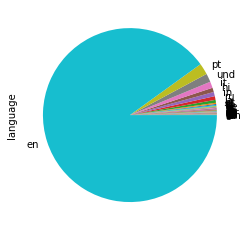

In [32]:
data.language.value_counts().sort_values().plot(kind = 'pie')

In [33]:
data['tweet'][1]

"@meatballsubzero Are you pro russia or pro Ukraine ?? I cannot tell, you said you're pro Ukraine and against the invasion but then you're posting stuff like this."

In [57]:
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)
    return hashtags


def generate_hashtag_freqdist(hashtags):
    import seaborn as sns
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
    'Count': list(a.values())})
    # selecting top 15 most frequent hashtags
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()


In [52]:
hashtags = hashtag_extract(data["tweet"])
hashtags = sum(hashtags, [])
print(hashtags)

['Zelensky', 'VolodymyrZelensky', 'Facebook', 'Deepfake', 'DeepfakeVideo', 'Russia', 'UkraineInvasion', 'RussianInvasion', 'RussiaUkraineWar', 'UkraineRussiaWar', 'YesPunjab', '1', 'KochIndustries', 'PullOutOfRussia', 'SanctionKochIndustryNow', 'BoycottKochProducts', 'PutinIsaWarCriminal', 'RussiaInvidedUkraine', 'UkraineWar', 'RaviVisvesvarayaSharadaPrasad', 'RaviVisvesvarayaSharadaPrasad', 'khaskhobor', 'VladimirPutin', 'USA', 'Russia', 'war', 'RussiaUkraineWar', 'Russia', 'Ukraineï', 'UkraineWar', 'NATO', 'Russiaâ', 'Ukraine', 'putin', 'Chinese', 'US', 'Russia', 'Ukraine', 'China', 'Russia', 'Ukraine', 'DPR', 'DNR', 'Donetsk', 'USA', 'Ukrainian', 'ExpressExplained', 'Russia', 'boycott', 'Zelensky', 'Koch', 'GQPTraitorsToDemocracy', 'Russia', 'zaharieahmedshah', 'coverup', 'fakeIMP', 'Alutech', 'Germany', 'Investments', 'russia', 'Hermann', 'guruforecast', 'astrology', 'DeathToPutin', 'Anonymous', 'ã', 'Ukraine', 'UkraineRussiaWar', 'russia', 'ãƒ', 'StopPutin', 'StopTheWar', 'StopRus

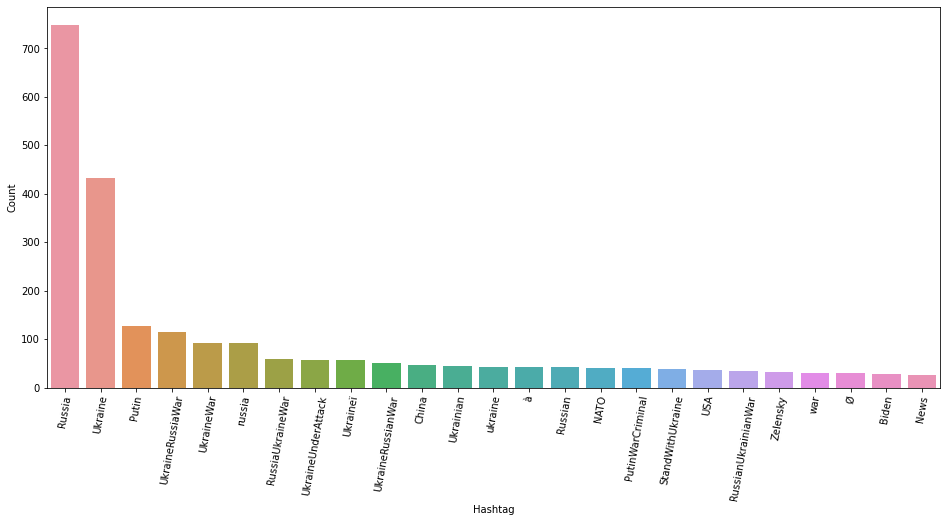

In [58]:
generate_hashtag_freqdist(hashtags)

In [59]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in data["tweet"]:
    count = count + 1
print(count)
average_length = total_length_characters / count
print (average_length)


0        130
1        162
2        167
3        220
4         81
        ... 
10009    255
10010     84
10011    176
10012    249
10013    216
Name: total_length_characters, Length: 10014, dtype: int64
1809200
10014
180.66706610744956


In [61]:
data['total_count_words'] = data['tweet'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print(total_words)
count = 0
for y in data["tweet"]:
    count = count + 1
print(count)
average_words = total_words / count
print (average_words)

0        22
1        28
2        26
3        32
4        15
         ..
10009    44
10010    11
10011    32
10012    39
10013    32
Name: total_count_words, Length: 10014, dtype: int64
271703
10014
27.13231475933693


In [63]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    print(text)
    return text
data["tweet"] = data["tweet"].apply(clean)


peterschiff padaprabu  would shit pant chang name countri russia
meatballsubzero pro russia pro ukrain  cannot tell said pro ukrain inva post stuff like
subway  plea stop busi russia everi dollar spent russia help putin financ war ukrain ukrainian live matter corpor dollar
russia prepar econom crisi develop expert natalia zubarevich sanction affect ordinari russian â€” tool govern soften blow â€” meduza  
bw putin fake news ðÿ“° rubl trash ðÿ—  russia histori ðÿ‹ðÿ½
russia â€˜run riskâ€™ histor default fail pay â£ million  
ericklokisson  absolut whatabaout tri pivot talk done justifi russia stop tool form opinion
prayerfeath russia putin war crimin putin held account russia choke sanctionsaggress inva  total unaccept russia etern dame
facebook remov deepfak video ukrainian presid zelenski  zelenski volodymyrzelenski facebook deepfak deepfakevideo russia ukraineinva russianinva russiaukrainewar ukrainerussiawar yespunjab zelenskyyua    
murder zelenski show congress graphic video russ

 first everi countri right safe guard interest  democrat countri like germani eu nation still buy crude russia us also confirm india violat sanction  seem
real threat citi londonwallstreet unipolar offshor  system china russia come point find replac path new brettonwood secur develop  
backand ohsendit make sure keep internet made china dont trust relay coordin russia eventu
ask donald advi put wall ðÿ˜‚ putin say russia must undergo selfclean societi purg bastard traitor thousand flee countri   
 twallerborg  specghost maxseddon maniac realiz insan sound imagin explain surviv children nuclear holocaust see destroy hope decent life earth beca
green tunnel ðÿš beauti ðÿ— ukrain ðÿ‡ºðÿ‡¦  ukrainerussianwar zelenskyy  russia  putin  
ravishrey matthewsharfman  askanshul ukrain said mayb wanna part nato far futur make full inva inevit think ukrain want fight russia
russia could default sovereign debt sanction crippl abil repay investor â† è¨˜äº‹åã€urlçœç•¥  ä¾µç•¥ã—ã¦ã„ã‚‹æ–¹ãœè²¡æ

china unit state    law control possess firearm sword regulatori measur   ill institut make countri gun   russia also made countri gun make  england
biden sad respon isnt enough help ukrain beat russia  
davidbcollum doubt peopl think us roll russia plain stupid
ãƒ—ãƒ¼ãƒãƒ³ãƒ­ã‚·ã‚¢ã®è¡œã„ã¯ã€æ­´å² ã«åˆ»ã‚€ã¹ã éžé“ putin russia deed inscrib histori outrag  ðñ‡ð¸ð½ðºð¸ ðÿñƒñ‚ð½ð° ð ð¾ññ ð¼ð°ñžñ‚ñœ ð±ñƒñ‚ð¸ ð²ð¿ð¸ñð°ð½ ð² ññ‚ð¾ñ€ñž ð•ð¿ð°ñ‚ð°ð¶ð½ð¾  ð”ðµñð½ð¸ñ ðÿñƒñ‚ð¸ð½ð° ð ð¾ññð¸ð¸ ð´ð¾ð»ð¶ð½ñ‹ ð±ñ‹ñ‚ñœ ð²ð¿ð¸ñð°ð½ñ‹ ð² ð¸ññ‚ð¾ñ€ð¸ñž ðð¾ð·ð¼ñƒñ‚ð¸ñ‚ðµð»ñœð½ð¾
part il patetico e sgangherato tentativo di propaganda da part della rusembitali ã¨ interess osservar la qualitã  di molti commenti con an richiest di asilo politico russia da part di diversi nostri presunti connazionali vadino vadino
mcfaul zelenskyyua need crui missil take russian ship blockad coastlin need abl hit target insid russia border like oil refineri troll farm kremlin
thestepwifey connieshermandm 

mfarussia simonwiesenth cafreeland rusembusa russianembassyc dpolun ambulyanov aalimov georgegalloway multipolarista benjaminnorton zakharova doesnt exist bot
standwithukrain ukrainestrong  warisr putinisathug putinwarcrimin  takeoutputin ukraineunderattack protectukrain murder zelenski show congress graphic video russia assault ukrain   via yahoonew
 piä™kni poleciaå‚eå› z przekazem z russia today
iaponomarenko alway expect nasti surpri behind appear simpl statement china never side west russia conveni price goug
mfarussia  
 skynewsaust remind    venezuela buy  missil russian loan putin complain nato  aegi ashor poland   venezuela buy  fighter jet russia  argument hypocrit
lukewearechang point could alreadi precip  point like better stop russia ukrain wait stop moldova lithuania latvia estonia poland  draw line  tri 
max right âœ… putin back russia ðÿ‡·ðÿ‡º nastiest corner sinc hitler attack englandðÿ‡¬ðÿ‡§ battl britain ðÿ‡¬ðÿ‡§ everyon know eastern disast  follow haphazard stumbl d

putin say prowest russian scum traitor ur scum amp traitor russia  u inslaveâ›“orâ˜ ï¸  urðÿ‡·ðÿ‡º  u believ one would tri stop ðÿ›u  oneâ‰ï¸  et tu brutus â€˜bruteâ€™  ur brute dream ðÿ¥ðÿ—£â˜ ï¸s ‡·ðÿ‡º ðÿ¤ªðÿ¦ ðÿ¤¥ðÿ¤¡   
hyperlex russia forgot turn autopay american leftist org ussr fell
maxseddon putin confus world want cancel russia world want cancel
fpwellman true definit appear gop mani member trump famili financ polit connect interest russia let talk dont ðÿ¤·ðÿ»â€â™‚ï¸
potus unit state stand u u r russia amp everyth el u r ukrain
potus stop lie world mastermind behind conflict financ breif ukr nazi provok russia prevent attack
 foxnew million palestinian ðÿ‡µðÿ‡¸ displac home  year ukrain handl without america hold hand itâ€™ sad whatâ€™ happen hope defeat russi
reedadamp  sentdefend kid  write russia letter donâ€™t  damn thatâ€™ advantag  writer know
uk foreign secretari liz truss visit india march end amid russiaukrain war  
 communic dont know yet   russia us alli de

pothen tweetreinhard chocboy julianku â€¦ geopolit game russia lose ukrain lose europ buy us militari equip gas ie win low cost boot ground bird sky took new kid
floraisadora sevssupersquad  ysxsh russia state explicit nato membership discuss progress russia would recogn independ feder within georgia georgia act tough russia invad georgia got wre
mwfolsomabq anneapplebaum davetroy seen mani french compani stay russia trade despit sanction
mfarussia ukraineunderattack ukrainewar presid putin right  column  dont trust food taster  better eat expir  meal feed left armi  also gru fsb chief might assassi
stonepawz grahamtuckeriii brethorstfr russia today creat ussr fell isnâ€™t ussr agai argument invalid neither countri technic establish  point mean noth
snope well suppo would terribl confus mass peopl fight see someth alarm russia deal russia realli sure get except reset button hillari hag wond
russia ukrain putinâ€™ threaten messag â€œscum traitorsâ€ among russianâ oligarch  
mrokay real

ukrain say russia bomb theatr mariupol hundr civilian shelter   satellit imag show word russian word children written larg letter outsid build  flashnew  
edmondthommen  timessport west obvious care war white peopl kill sanction uk usa russia terrori middl eastern countri decad
foxnew judgejeanin sound exact like someth putin would someon say shown russia state tv  america call west
rã¤tsel um pekingflug von russia russland auãÿenminist lawrow  auf halber streck dreht er um  zurã¼ckk nach moskau bild ukrain russianinva    
  claudiawheatley   plus year  trump russia collus  fox  right msnbc cnn wrong  rittenh  sandman  bounti us soilder hunter laptop smollett  wallac summer  avanati v
us presid biden brand russia presid putin war crimin   bbcworld via unfollow
en el corredor humanitario de mariupol los soldado ruso revisan que escap ningãºn neonazi de nazinski chequean signo de haber participado en batalla si tienen tatuaj si han escondido alguien en la maleta de automã³vil  ukrain rus

accord irish examin european parliament resolut condemn russia aggress ukrain call russia withdraw hit thirteen mps includ daley irish independ changemak
 elonmusk dont worri us go war russia everyon dead pain
chinaâ€™ respon russiaâ€™ inva ukrain could upend world order  
   live china cant clearer discrimin hostil western countri toward us russia face intern situat similar serious
cliff note dummi youtub cliff note refresh knowledg origin russia thing stand ukrain  kaf histori historyfact historymatt  
thorlm  donâ€™t see three nation us russia ukrain run capitalist want see putin outsid system everyth heâ€™ done sinc took power year ruthless capitalist run ha
maxseddon nah dont want cancel russia putin
justintrudeau russia right side
pwnalltheth respect think miss nuanc zelenski messag name time still need deci ukrain interest  ukrainian suffer terribl time side russia armi 
liomanbad wanna know john k fanboy call pedo month back  support childtraffick countri like russia
marshahair

 eileendiana block undesir opinion twitter strike fear first creat competitor three count kind trade bank bloc would russia china india make
maxseddon could argu  similar western societi slave expect cheap product china cheap fuel russia
mfarussia watch true histori bitchut documentari â€œeuropa â€œ
kyivindepend ðÿ™ðÿ»ðÿ‡ºðÿ‡¦ðÿ˜¢ deci made power world assist ukrain fli zone russia wwiii occur nato take time decid alli russiachina nuclear
ushabibi erikinwien aaronjm hes tell truth hate russiaðÿœ
rtcom tassag kremlinrussia commit murder ukrain citizen modrussia want rememb
  litalia fatta da italiani ã¨ sempr dalla part di chi delinqu lo ripeterã² fino allesasperazion rimetterci saremo sempr noi non la signora russia pae unito di immensa cultura di principi e piena di ricchezza
pedromcalv huxijingt us nato timid rat dare even send troop fight russia want find china adversaryï¼ÿï¼ÿï¼ÿ
furyofkahless armedforcesukr  poor qualiti comm compound russiaâ€™ logist troubl  junior offic lack in

peopl freak russia invad ukrain mad also oh total need cop protect us horrif capitalist societi built genocid slaveri imperi doom climat
hachiojihitsuji bbcworld russia fall dream us nato done everyth russia unit china iran iraq saudi arabia india unit arab emir afghanistan venezuela alreadi agr abandon
thetnhol doesnâ€™t make us energi independ rather insist buy oil like russia  
 hillaryclinton whos brainwash obvious evid amp fact mean noth chick russia violat law feel arrest necessari
huluusmith problem year spare part import vehicl video wont avail longer russia  wont abl  one favorit russian car channel mention
militaritaliani guerradelpot ucraina putin  draghistan  militari noguerra notizi russia  guerradellinformazion propagandapolitica  vorrei dire questa gentilissima signorina   che non capisco  perchã¨ non possiamo lasciar  nostri  
watchdogintel mean realli doubt knew obvious knew someth doubt russia told much general head
npr well answer easi dont anybodi fli russia anymor 

sibirskykot russiainusa midrf kremlinrussia modrussia minenergogov usaporusski usembru ðñðµ ð²ðµñ€ð½ð¾ ñ‚ð¾ð»ñœðºð¾ ñ‚ñ‹ ð¿ðµñ€ðµð¿ñƒñ‚ð°ð» ñ…ð¾ñ…ð»ñð½ð´ð¸ñ ð·ð°ñ…ð²ð°ñ‡ðµð½ð° ð˜ ð¼ñ‹ ñðµð¹ñ‡ð°ñ ñ‡ð¸ññ‚ð¸ð¼ ññ‚ñƒ ð·ð°ñ€ð°ð·ñƒ
koch industri side russia back group oppo us sanction  cbs news  
crtc ban russia today rt  good riddanc  let see rightw cri foul  definit cdnpoli
 putin doesnt even care russia russia
snope nedemocraci ps read manufactur consent elit use get richer drum support conquer russia
donâ€™t want even like  celebr  guess poor fight russia
asid traitor fool richard fowlerfox news contibutor ths guy think biden take iran irgc terrorist nofli list good thing also thnks russia negoti oil deal iran america good thing
anusehg  central asian nation use black sea trade slowli slowli russia control black sea nation want pass ship maintain cordial relationship w russia
 feel threaten reason russia
tak pelik harga minyak naik tengok laa ukrain dgn russia
russia expel human r

ejmalrai georgegalloway moatstv war russia putin peopl wef go peopl label  industri revolut peopl noth happi   creat nato keep russia usa germani
un messag despoir les nã©gociat de paix entr la russi et lukrain pourraient enfin commenc  ðÿ•šï¸ messag hope negoti peac russia ukrain might start  ðÿ•šï¸ westandwithukrain peaceinukrain
sethhettena lukeobrien oligarch russia hundr year matter call
tuckercarlson ukrain stori true ukrain industri miltari complex narrat say ukrain stop russia cold amp coup alreadi work overthrow putin biden talk say russia inflict ap
russian opposit  littl late     russian believ support putin    nobodi el save russia     dont let happen america  
acosta victoria nuland told senat us ukrain  work biolab border russiaget truth  intern team need reason strong russian defend  biochem china ðÿ‡¨ðÿ‡³ angri wuhan viru
common brand name still activ particip russiaâ€™ economi   
foreign fighter flee ukrain ðÿ‡ðÿ‡ðÿ‡  â€œthe whole foreign legion got eliminatedâ€  â€

acyn hcrichardson republican voter plea ask â€œare politician work unit  state russiaâ€
us amp russia allieâ€™ expo deep state amp crush nwo sound like great movi plot  
idea putin keep war go save face must reali go win war realli impoverish countri think want man russia
rtcom stop war zelenskyyua must reali weapon mean destruct ukrain suppli arm europarlen nation like trap war time goe land ukrain loo  kremlinrussia 
 ianadastra mayb russia start fight  border
bryvkin would postputin russia look like could someon oust keep apparatus place possibl power vacuum
myrdleon apeththedaft wiphala owenrumney z cushbomb im disput point would less kill surrend immedi ie   men azov right sector neonazi mi
russiaâ€™ behavior ukrain provok intern crimin court open investig war crime itâ€™ far certain anyon brought justic intern law   via bpolit eelarson
ukrain destroy russia  propaganda video  machin destroy
explain india look bypass us sanction buy oil russia   via finshot
sturdypil werenâ€™t lo

rafastayn lakalvtub wagnerthomazoni sim mas na ucrania tu consegu troca governo se tã¡ muito corrupto e tu nã£o gosta  e na russia e governo atual zelenski foi colocado em  ou seja nem faz muito tempo para vc jã¡ dizer que toda 
like caus russia resort outdatedâ weapon  
think us basic fought russia without send soldier ukrainian russian die ukrain get destroy us defen compani make load money
journalist flee russia putin crack ukrain inva  
 go russia doesnt defen polici analyz
 clintehrlich suppo say talk shit russia say russian arenâ€™t slav stupid true shut fuck
 rndntwit billbrowd yup heâ€™ fine expen yacht caviar loyal old nationalist russia promot evil valu â€˜modernizeâ€™ let alon democraci equal right hate ukrain see
 sudhirntv hehe dude attack fight flight hun natur peopl countri fight u right left n center russia come tabl talk thought coz r superpow 
ukrainewar negoti term russia militari defeat amp leav ukrain never return mind busi deal w russia temporari amp countri live 

 dont want war stop  joe destabil europ russia war  turn ultim go help ðÿ‡¨ðÿ‡³ becom next super power help joe cheat u amp dethron
shaknknotstird kremlinrussia ð•ð³ð¾ ð½ð¾ð²ñ‹ð¹ ð´ð¾ð¼ ð¶ð´ðµñ‚ ðµð³ð¾  
attack hospit genocid ukrainian fight countri freedom digniti putin crimin  putin train kgb want expand russia putin imperi ambit end isol competit
russia deputi foreign minist said moscow warn us pour weaponri ukrain danger move    via commondream
may last video russia interv ukrain explain   via youtub
bolizen  joevstaylor  vp right russia want turn clip articl
juliadavisnew putinâ€™ russia reach enema stage  
chukandgek  lot fake stuff truth  russian armi weak bc corrupt bad leadership  ukrain prosper eu countri  year  russian face econom catastroph come soon  putin humili russia
kremlinrussia âš¡ï¸human right watch least  civilian take shelter bomb mariupol theater   belki hrw senior research said mar  â€œthis rai serious concern intend target citi civil
justintrudeau ban rebel ne

billbrowd chill peopl live russia direct oligarch educ middl class would support navalni want opportun choo live base ignor old time russian natio
russiaukrain war àª¯à«àª¦à«àª§ àªµàªšà«àªšà«‡ àª¤àª£àª¾àªµ àªµàª§à«àª¯à«‹ àª¬àª¾àªˆàª¡àª¨à«‡ àªªà«àª¤àª¿àª¨àª¨à«‡ àª—àª£àª¾àªµà«àª¯àª¾ àªµà«‹àª° àª•à«àª°àª¿àª®àª¿àª¨àª²    russiaukrainewar joebiden putin warcrimin  
kremlinrussia ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦
ukraina russia outlaw us china poland stop massacr innoc us becom world polic china show posit poland attack russia bomber fact russia weak histor sihgt nuke
un secur council vote friday russia move ukrain ukrain ukrainerussianwar ukrainewar war ukraineunderattack  ukrainerussia russia ukrainian  russian kyiv reuter    
 msnegovaya loom realiti russia purg everyon terrifi march gulag
braxtonmccoy dramat 

jaynordl rpsagainsttrump general mani republican trade loyalti us russia problem isnt
 greennorway olliecarrol good joke bro even russia didnt defeat ukrain ukrain would suffer year year
theyr make sound like drug kingpin think unlik ms griner get fair trial conclud jonathan frank nobodi get fair trial russia rig game  
fear grow russia default debt need know  
morphonio  russia win prize  million hostil popul eventu shred occupi  mention russian economi crush
olympiakan  reuter name russia putin yes
joshuadenjam fbodybuddi antrtw spectatorindex ukrain support mean support russia mean support inva mean hypocrit
russiaun mfarussia missionrf missionrussian rusembusa cisrussia pamelafalk whitelenka baysontheroad uncanew passblu theatr mariupol children bomb make abhorr attack next g
ukrain russia explor neutral plan peac talk  
elexmichaelson repyoungkim zelenskyyua youngkimca foxla marlatellez talk make ukrain  state would provid direct mandat enter thermonuclear war russia order preserv

dont want cancel russia want cancel putin like want cancel hitler autocrat despot
 papajohn instead bark twitter go russia protest outsid pizza shopsðÿ˜‚
sombraargmofo reuter didnt say hit purpo comment brazen lie told claim wasnt russia drop bomb rush defend
â—çœÿç©ºç®¡â—ãƒ­ã‚·ã‚¢è£½ ãƒ‹ã‚­ã‚·ãƒ¼è…  ¬ æ–°å“æœªä½¿ç”¨ viii ç™½ ´ä»£ ãƒ‡ãƒƒãƒ‰ã‚¹ãƒˆãƒƒã‚¯ èª¬æ˜žæ›¸ä»˜ã ã‚½ãƒ“ã‚¨ãƒˆ ã‚½é€£è»ç”¨â—   ãƒ¤ãƒ•ã‚ªã‚¯ nixietub nixietub ãƒ‹ã‚­ã‚·ãƒ¼è… ãƒ­ã‚·ã‚¢  russia stoprussia
pandemictruth nope china play middl best interest theyâ€™r help russia us need differ reason russia fall china exploit russia option
queerbengali feel like antiwar activist would okay russia invad neighbor long stay uninvolv
world longer ukrain russia ruin civil vanish destroy nato readi launch nuclear strike russia era russia map warn
 foreign polici analyst institut global dialogu sanusha naidu russia order suspend militari oper ukrain  ðÿ”—    sabcnew  firsttakesa  
ucrania como ninguno de sus medio tien censu

tarasberezovet mccaul republican tri save ass republican gop gop enabl war embrac russia gop nazi type adgenda suppress human right freedom gop blood hand
natkpowel robjgoldberg lioneltrol feel way stalinist russia lesser extent british empir yet iâ€™m still glad rooseveltâ€™ usa alli hour need sure putin isnâ€™t hitler heâ€™ also 
drjacobsrad china want us amp rest west war russia weaken side isnt rocket scienc dont give damn whos dictat globalist puppet die etc
iâ€™m kind piss russia didnâ€™t sanction honest
vasumogan thatâ€™ russia 
potus use money citizen instead send weapon ukrainian fight death know nobodi win war sinc mani   promot peac talk within russia 
mfarussia thank share â„¹ï¸ ðÿ‡·ðÿ‡ºðÿ˜‡â˜®ï¸ðÿ™
philoshua threat work condit clear consequ clear make condit consequ fuzzi less effect  plausibl threat would go war w russia behalf ukrain ther
make derma filler botox russia way cut putin face suppli heâ€™d come run littl hand
zelenski compar russian inva  pearl harbor atta

 think time russia warn us  weapon ukrain equat interv consid combat
never ever eat right wing pizza russia anyon notic us hotel still open russia
bomber amp chief  mind left amp psychopath whisper ear bomb russia take chanc well inhal radiat particl decad live wwwiii  paxamericana  ukrainewar prayforpeac
usrealitycheck â€ favor us militari action even risk nuclear conflict russiaâ€  utter insan   
bewar peac talk russia alway propo negoti  purpo abid agreement thing get difficult plan go awri buy time reassess regroup correct mistak find weak spot strike new vigor  dzhokar dudayev
sochangan krobinjr aaronparna jokeright  russia case didnâ€™t know â€œrussiaâ€ invad ukrain amp commit war crime stick know old trumpian propaganda justold
johnamac nhl deci led path play  nhl game mani game nhl deci lace play russia lead zero
jewrussophil russia ban export semiconductorgrad neon palladium titanium ammonium nitrat
yet uk us govt still suck russia biden heinous iran deal five countri includ

¸‡äººã®ãƒœãƒ©ãƒ³ãƒ†ã‚£ã‚¢ãƒãƒƒã‚«ãƒ¼ãœãƒ­ã‚·ã‚¢ã¨ã‚µã‚¤ãƒãƒ¼ç©ºé–“ã§æˆ¦ã£ã¦ã„ã¾ã™ã€‚itã«ç²¾é€šã—ã¦ã„ãªã„äººã§ã‚‚ã€è‡ªåˆ†ã®å‡ºæ¥ã‚‹ä»•äº‹ã‚è¡œã£ã¦ã„ã‚‹ã‚ˆã†ã€‚  â€˜itâ€™ right thing doâ€™  volunt hacker come togeth fight russia  
kyivindepend russia lost  lost 
chrisloesch yes russia larg system ukrain  kiev birthplac russia  live  year dont see much differ cis state
look like ukrain right india reevalu posit continu sourc cheap oil amp weapon russia
ironi let start war russia crowd tri garner support appeal potenti inva us china alreadi invad west coast san fran seattl mexicocentam invad southwest real time bless
itâ€™ hard size russia hit earn     opinion
 yespeopl mistaken think russia civili nationputin repr countri quit well rate alway risen previous war
ysxsh russia war  want fight get real one  cant negoti warmong tri clean nation amp steal land understand one languag blunt forc
ukrainian presid volodymyrzelenski drop clear hint possibl concess russia cou

 yes iâ€™v say  want zelenski croak get none busi deal avail anybodi big guy  hunter crackhead work burisma get paid  put russia ukrain 
vitali klitschko russia attack militari base bull   via marca
 globaltimesnew rubbish sure problem inva necessari especi target civilian u honest say russian afraid nato russia feel deserv domin relationship w
 arrelleay neominarchist jacksonhinkl putin liter secret love child hitler eva braun russia racist imperialist state histori world
russia dig whatâ€™ risk nuclear war â€˜itâ€™ zeroâ€™ max fisher via nyt  
would rather trust russia trust west unit state america nato went war iraq accus saddam weapon mass destruct still wait see weapon went kill muammar gaddafi without evid
ukrainian forc strike back russia biden send firepow michael schwirtz valeri hopkin carlotta gall via nyt  
 would ukrain justifi attack mass russian troop know know russia mass troop
moldova rememb name non nato countri border ukrain russiaâ€™ next target
ronfilipkowski dumb b

null russia move seiz foreign plane    
kremlinrussia putin start war versus innoc ukrainian putin claim west threaten russia west alway includ russia econom growth putin murder ukrainian west decid longer support russian economi russian economi tank
still ounc doubt side choo genocid war putin russia forev wrong side standwithukrain  makeputinpay
pandaspu  ccymro  russia spend around  billion militari howev unlik us distribut militari fund equal russia give  billion nuclear missil anti missil defen system make po
wallstreetsilv russia get better day bank sell gold get away petro dollar close poison food factori etc
yall realiz nazi russia right like lot signif place world incl ukrain talk point blatant manipul shallow cant even express text reject propaganda folk hard
anonasnon ambergday joycewhitev heâ€™ weak russia didnâ€™t even invad countri presid like yeah man weakest presid whatâ€™ say administr let taliban take afghanistan stand
anyon talk lift sanction talk defeat russia regim

funder anyth hinder russia current attack would support
brithum putin head biden administr fear wwiii step putin red line us alreadi war russia putin bulli thug war crimin thing understand power stood 
cant deal peopl topic like beyond clueless even basic histori complet elud peopl ukrain nuke russia
danielmarven russia understand snake well know deal profess enough know overhyp import renwick rupert friend russia stoog get right
like main us object turn ukrain anoth afghanistan syria â€”a prolong violent bloodi conflict us back insurg urban warfar destroy citiesâ€” order bleed russia destabil region amp putin govt buysel weapon etc
jysexton money launder thrive  russia usa
piotrtrebisz  twwettierr globaltimesnew trishregan india big russia term land weapon war would germani definit go germani india rememb histori
also homlessmesoon say putin unwel look bitch yesterday video  russian ppl make  money russia live west
facebook remov russia post claim childrenâ€™ hospit bomb hoax  
kyivin

In [64]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in data["tweet"]:
    count = count + 1
print(count)
average_length = total_length_characters / count
print (average_length)

0         64
1         87
2        120
3        134
4         62
        ... 
10009    126
10010     74
10011    115
10012    126
10013    137
Name: total_length_characters, Length: 10014, dtype: int64
1144679
10014
114.3078689834232


In [65]:
data['total_count_words'] = data['tweet'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print(total_words)
count = 0
for y in data["tweet"]:
    count = count + 1
print(count)
average_words = total_words / count
print (average_words)

0         9
1        14
2        19
3        19
4        11
         ..
10009    20
10010    10
10011    19
10012    20
10013    18
Name: total_count_words, Length: 10014, dtype: int64
163218
10014
16.298981426003596


In [68]:
from textblob import TextBlob


In [74]:
def analyze_sentiment(tweet):
    analysis = TextBlob(clean(tweet))
    print(analysis.sentiment.polarity)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [75]:
data['Sentiment'] = data['tweet'].apply(lambda x:analyze_sentiment(x))
# print(data['Sentiment'])

peterschiff padaprabu  would shit pant chang name countri russia
-0.2
meatballsubzero pro russia pro ukrain  cannot tell said pro ukrain inva post stuff like
0.0
subway  plea stop busi russia everi dollar spent russia help putin financ war ukrain ukrainian live matter corpor dollar
0.018181818181818174
russia prepar econom crisi develop expert natalia zubarevich sanction affect ordinari russian â€” tool govern soften blow â€” meduza  
0.0
bw putin fake news ðÿ“° rubl trash ðÿ—  russia histori ðÿ‹ðÿ½
-0.5
russia â€˜run riskâ€™ histor default fail pay â£ million  
-0.5
ericklokisson  absolut whatabaout tri pivot talk done justifi russia stop tool form opinion
0.0
prayerfeath russia putin war crimin putin held account russia choke sanctionsaggress inva  total unaccept russia etern dame
0.0
facebook remov deepfak video ukrainian presid zelenski  zelenski volodymyrzelenski facebook deepfak deepfakevideo russia ukraineinva russianinva russiaukrainewar ukrainerussiawar yespunjab zelenskyyua 

gamestart nomadexil experienc great difficulti world right know current ukrainerussia war peopl worri plan team increa metav market project period nom
0.36190476190476195
holika dahan may sorrow pain cea exist may lead bliss healthi happi life happi holi  holi holikadahan  russia kashmirifil  mickey  qmcsindia  
0.0
seanhann happen money russia take ukrain russia control itâ€™ money stupid bill call repr pass
-0.7999999999999999
ukrain ukraineunderattack ukrainewar  ukrainerussianwar russia  makelovenotwar   
0.0
russian soldier audio  â€œmum tell itâ€™ like came arenâ€™t fascist banditsâ€¦ war fabric wasnâ€™t necessari done ukrain doesnâ€™t join nato priceâ€¦ fck russia want show forceâ€  listenâ€¦  
0.0
  butisailaway drockdoubl viabl solut us get involv let conflict end quick thing far gone go artifici extend conflict pour arm peopl
0.21666666666666667
rãšssia x ucrã‚nia como investidor deve se posicionar diant cenãrio    via youtub
0.0
rezich paulg yeah see point clear well want 

green tunnel ðÿš beauti ðÿ— ukrain ðÿ‡ºðÿ‡¦  ukrainerussianwar zelenskyy  russia  putin  
-0.2
ravishrey matthewsharfman  askanshul ukrain said mayb wanna part nato far futur make full inva inevit think ukrain want fight russia
0.22499999999999998
russia could default sovereign debt sanction crippl abil repay investor â† è¨˜äº‹åã€urlçœç•¥  ä¾µç•¥ã—ã¦ã„ã‚‹æ–¹ãœè²¡æ”¿ç ´ç¶»ã—ãÿã‚‰ã€ã¡ã‚‡ã£ã¨ã‚«ãƒƒã‚³æ‚ªããªã„ï¼ÿã€€ãƒ—ãƒ¼ãƒãƒ³ã•ã‚“ï¼ÿ  
0.0
reviewspossum peopl uncrit read articl russia open negoti face us obstruct know attitud rest world deal  among deal propo nato move back w
0.0
judg unanim order parti refrain action might â€œaggrav extend disputeâ€ vp gevorgian russian judg xue chine vote order suspen russiaâ€™ militari oper  
0.05
 im go make predict   year bar nuke war axi global geopolit control evolv us russia resourc china industri india tech us forc give war crimin new war crime tribun 
0.06818181818181818
 sputnikint good peopl brazil ukrain russia illeg geno

content warn graphic imag war  putinwarcrim forgiv russia russian china chine taint narendramodi israelipm
0.0
new big troubl  billionair mikhail fridman say intern communiti proven fundament misunderstand way power putin function russia  read big take â¬‡ï¸  
0.04545454545454545
 craigdmorrison maxseddon arashmassoudi  russia took lot land peopl want part russia ichkeria recent exampl  itâ€™ hard believ comprehend desir crimean peopl
-0.14583333333333334
euromaidanpress russia doesnt care flag
0.0
 jackposobiec ukrain blood hungri leader russia quash ukrain money launder  potus
0.0
marshahairbrush rusembjakarta mfarussia natomissionru nato kemluri rusembusa rusembindia embassyofrussia  
0.0
mortisban dont know nuclear power could ever forc uncondit surrend someth happen within russia even rout complet ukrain
0.0
kremlinrussia dictat evil jackass lower worm sht kill innoc children women say free person world see atroc peopl russia putin lie war   
-0.3666666666666667
 road lead â€œfuc

0.0
doubt mix feel moment demand big compani leav russia end busi time turn blind eye player choo play  ðÿ—£ï¸ piotr zelazni via tvp
-0.25
russia state tv hit stream resign  one russia biggest talk show host ivan urgant taken break primetim even urgant show russia second biggest channel channel one station marina ovsyannikova   
0.0
rtcom wherea russia prefer blast away apart block like real nazi shame
0.2
un intern court justic order russia halt inva ukrain  
0.0
avtovaz renault resum product russia bmw less profit conflict inâ ukrain  
-0.16666666666666666
 sorryformytak bnonew post support russian rape ukrain spare plea â€œpeaceâ€ russia broke peac  peopl go back stone age son fertil ukrain
0.0
fact michel de nostredam predict happen back  hundr  ukrain russia nato nostradamus
0.0
neilaxelrod magarisingjohn see said even infer russia good guy ergo self edit part would prudent legit question
0.7
rtcom stand russia
0.0
dont let joselin kani mess make forget britney griner black woma

full inform war ukrain russia default immin ministri emerg situat inform  russian soldier die ukrain war standingwithukrain
0.175
russia good vlad bad
5.551115123125783e-17
ðÿ ðÿhacker hack websit ministri emerg situat russia  ðÿ‡ºðÿ‡¦hyperlink appear main page agenc word dont trust russian media â€” lie  
0.08333333333333333
thewgd bap wrong russia everi bit globalist empir nato
-0.5
wake peopl watch happen ukrain russia  russia tri protect world bio weapon ukrain work   iâ€™m say donâ€™t trust everyth media tell youâ€¦ ðÿ¤”
0.0
russia dig whatâ€™ risk nuclear war â€˜itâ€™ zeroâ€™  
0.0
hillari clinton speak brittney grinerâ€™ arrest russia â€˜free brittneyâ€™   via yahoo
-0.05
curtishouck europ continu buy  gas russia even inva germani  natur gas  coal amp  miner oil use come russia india must think place histori book buy ru
0.0
ok russia win ukrain underestim resist next step wil scale effort time face putin begin full scale war russia live threat  year cold war era time showdown 

0.033333333333333326
burger king still russia see side histori theyâ€™r
0.0
ø§ù„øºø§ø±ø§øª ø§ù„ø±ùˆø³ùšø© ø¹ù„ù‰ ø®ø§ø±ùƒùšù ùø¬ø± ø§ù„ùšùˆù…  russia â€¢ ø±ùˆø³ùšø§ ukrain â€¢ ø£ùˆùƒø±ø§ù†ùšø§  
0.0
æ˜¨æ—¥ã®mfa russiaã®æ—¥æœ¬èªžç‰ˆ
0.0
ð†ð”ð€ððƒðˆð€ððžððð„ðð•ð„ð russiaukrain war latest kremlin anger biden call putin war crimin us send militari aid â€“ live       
-0.0212121212121212
ukrain russia russiaukrain war latest kremlin anger biden call putin war crimin us send militari aid â€“ live russian forc â€˜purpo cynic destroyedâ€™ mariupol theatr say local offici zelenskiy call russia aâ€¦  
-0.01272727272727272
impacto ambient na disputa entr rãºssia e ucrã¢nia uma vã­tima nã£o relatada da guerra   ðÿðÿ½ novo instagram
0.0
rwnj tell report duti need  remedi english  oneway ticket russia
0.0
kremlinrussia ðÿ¤£
0.0
brucep presssec war russia putin peopl wef go peopl label  industri revolut peopl noth amp happi   creat nato keep russia usa germani 

dcexamin davidmdruck putinswar serv peopl russia suffer brutal russian respon putin action afraid step battl putinthechicken unlik zelenskyy lionheart cower behind
-0.355
russia gonna call mfer even chanc general arkadi ourumov ðÿ¤£ ha yeah right ass gonna get smoke glorytoukrain goldeney  
0.16785714285714287
tommiparkkonen russianembfinla mfarussia surkeeta touhu
0.0
abandon academ relat invad countri academictwitt discuss implic abandon academ relat russia ubc academ polici research amp scholarship committ month account ubc senat motion today  
0.0
russiaukrain war latest kremlin anger biden call putin war crimin us send militari aid â€“ live  
-0.0212121212121212
russia ukrain news à¤¬à¤¾à¤‡à¤¡à¤¨ à¤¨à¥‡ à¤°à¥‚à¤¸à¥€ à¤°à¤¾à¤·à¥à¤ÿà¥à¤°à¤ªà¤¤à¤¿ à¤µà¥à¤²à¤¾à¤¦à¤¿à¤®à¥€à¤° à¤ªà¥à¤¤à¤¿à¤¨ à¤•à¥‹ à¤¬à¤¤à¤¾à¤¯à¤¾ â€˜à¤¯à¥à¤¦à¥à¤§â à¤…à¤ªà¤°à¤¾à¤§à¥€â€™  
0.0
canâ€™t invit russia join nato
0.0
 went w germani amp korea tension high talk war air e germani delib give russia fal inte

rebelnewsonlin im realli tri understand pro russia talk ive read lot articl websit expect crazi putin prop thing actual found close resembl news 
0.0
berkeleydowd yeah right make mad hes bomb hospit aptsðÿ˜¡ðÿ˜¡ðÿ˜¡ ill tell whatgiv flight russia  ill put bullet headðÿ˜„
-0.3348214285714286
blood left rino hand care  orcrast coup nazi setup biolab next russia adam schiff hous floor time go fight russian ukrain instead home kid think send
0.0
floraisadora abulabanjumana drjeremyteuton ysxsh weâ€™r talk inva weâ€™r talk interest influenc ussr set missil cuba usa destroy cubaâ€™ economi russia go ukrain itâ€™ irr
-0.2
 northmantrad lesser reason might call excus real reason putin believ fall ussr largest geopolit error modern russia made said mani time wan
0.05
icir newsupd march   insecur increa airfar could put nigerian risk    russiaukrain conflict put pressur nigeriaâ€™ weak power sector gas firm target premium buyer  
-0.2875
cookieisback hillaryclinton hilari crackhead hunter biden 

0.30000000000000004
volshebnicaa inshallah ya pochemuto dumala chto vi v russia â¤ï¸
0.0
chavareshritej russia economi destroy
-0.2
repadamschiff ok mr russia hoax ðÿ¤£
0.5
rusembjakarta mfarussia natomissionru nato kemluri rusembusa rusembindia embassyofrussia us negara provok kasih pelajaran mereka itu timur tengah hancur juga karena ulah us  uraa
0.0
coloradotravi gulovsen despit rhetor realiti russia afraid nato    like polish czech slovenian pmâ€™s show kyiv juici target russia wouldnâ€™t dare hit
-0.6
mattwalshblog think bothâ€¦understand want still want captain america land ukrain kick russiaâ€™ butt â€¦no one want world war iii startâ€¦w stupidâ€¦w hate fe
-0.8
putinswar serv peopl russia suffer brutal  putinthechicken afraid step battl unlik zelenskyy lionheart  putin cower behind desk peck order chickenheartedputin
-0.625
ðšð¾ð½ð³ñ€ðµññð¼ðµð½ñ‹ ð±ð»ð¸ð·ðºð¸ ðº ñð¾ð³ð»ð°ñˆðµð½ð¸ñž ð¿ð¾ ð·ð°ðºð¾ð½ð¾ð¿ñ€ð¾ðµðºñ‚ñƒ ð¾ð± ð¾ñ‚ð·ñ‹ð²ðµ ñƒ ð ð¾ññð¸ð¸ ññ‚ð°ñ‚ñƒñð° ð½ð¾ñ€ð¼ð°ð

lsg group say crypto exchang deal russia could see setback   nft tezo
0.0
piratenori polarpolitico nice also irrelev sinc isnt america russia invad
0.6
alvinfoo prolong escal war hypothet russia spent billion dollar arm train hostil mexican canadian govern almost decad would american stand noth deescal war say
-0.03333333333333333
intern outrag russia inva ukrain grew thursday us ukrainian offici said civilian wait line bread shelter theatr kill russian forc  
0.0
professor kirschner unfortun two world biggest power usa russia run byassoci two evil earth even wor  glu aw symbiot way im still hope good triumph evil justicematt
-0.43333333333333335
bruh russia could blow ukrain  want dont get confid
0.0
nolt democrat media risk wwiii russia win  midterm   via breitbartnew
0.8
heightstig cryptoacr   jackposobiec liter say russia corrupt
-0.5
ukrain russia continu talk video    ukrainerussiawar russianukrainianwar
0.0
nytim ran away afghanistan vietnam also  got loss russia get  want histo

-0.8
vp sanction russia ðÿ‡·ðÿ‡º give russian alli relief promi continu launder russia money via iran deal  mastermind polit ðÿ˜‚
0.0
japan withdraw nuclear cooper agreement russia  pm  russia moscow japan world tokyo  
0.0
canada hit back russia
0.0
kidongochekundu bbcswahili wanamchochea ili russia  akasrik ampig kisawasawa ili usa wapat sababu ya kumwekea russia full trade embago
0.35
  juliussmalema answer question dont know russia attack ukrain
0.0
evansmount lizcheney politico go russia
0.0
awaken hundr peopl bomb theater research russia abl take coup one five believ conspiraci theori  conspiracytheori theater peopl russia moscow five  
0.0
libyaliberti true putin finish would smart move china upsid china help russia way
0.28214285714285714
kremlinrussia confus easili wouldnt solv problem least number step isnt tomorrow russia one street pave gold amp technolog futur bright star world look forward russia choo past  
0.050000000000000024
paulyglottv yes say peopl act like putin st

andersaslund grantstern potus secblinken yeah donâ€™t get credit ukrainian get credit meanwhil still use russia negoti partner weâ€™r plan hand  billion russia build 
0.0
one trumpâ€™ closest white hous advi admit â€˜itâ€™ hard describ littl knowsâ€™  context knowledg much anyth â€œhe ask  john kelli finland part russia trump   
-0.030555555555555558
brittney griner play russia sinc  knew law hope jail polit prison use drug countri crime ht theofficertatum fact hate america anyway let stew
-0.45
armatosatheus yupgotem putin demand give alaska back russia us pay alaska
0.0
putin afferma che le sanzioni alla russia non sono il risultato della guerra allucraina fanno part di un piano per distrugg la russia
0.0
russia impo sanction biden clinton  
0.0
cpthacki  derekjgrossman usa alway vote india even articl  recent russia veto better uae also consid busi dollar start currenc swap agreement
0.25
russia ukrain russiaukraineconflict russianukrainianwar  
0.0
os conselho de eslomarqu sã£o os 

peopl push nofli zone flatearth think russia thousand mile away  
0.0
plkrstnjn namesoflondon dszeligowski im ukrain never feel safe without nato membership nuke regardless resolut current war govern place russia point  dont worri russia
0.25
  nytim  realiz thread start comparison ny time us russia execut war right point us far less casualti compar russia execut war p
0.073015873015873
tuckercarlson except longer peac west bin wage econom warfar activ engag aquisit destribut activ target insid ukrain awac satelit  russia know clear st
0.10000000000000002
anali putin speech  scum traitor hes much wor osama bin laden hitler stalin pol pot assad etc world playground battlefield russia ukrain hisðÿ©¸ðÿ©¸toy collat
-0.04999999999999999
biden announc addit import export restrict russia  intern law  unit state  mondaq news alert  
0.0
à­ÿà­à¬•à­à¬°à­‡à¬¨à¬° à¬†à¬¶à­à¬°à­ÿà¬¸à­à¬¥à¬³à­€à¬°à­‡ à¬¬à¬¿à¬¸à­à¬«à­‹à¬°à¬£ à¬šà¬¾à¬ªà¬¿ à¬¹à­‹à¬‡à¬—à¬²à­‡ à¬¹à¬œà¬¾à¬°à¬°à­ à¬…à¬§à¬¿à¬• à¬²à­‹à¬

0.0
 well whole thread russia kind get ass kick conceiv might get outcom find accept
0.4
adamscochran hey russia dont tri reclaim alaska ðÿ‡ºðÿ‡¸
0.0
nih yet respond accus fund â€œcruelâ€ â€œdeadlyâ€ experi agenc plan continu fund research russia light ukrain inva   
0.4
coatbridg past present cut tie russia loool  
-0.125
lsg group say crypto exchang deal russia could seeâ setback  
0.0
elon musk explain enter horrif crisi due russia   via youtub
-0.125
cdavandaag mustafaamhaouch russia militari action ukrain genocid ukrainian peopl  kill children kindergarten matern hospit netherland stop support war ukrain dont buy russian oil emba
0.05
marwanbishara sorri agr  say  peopl tri right thing wherev live troubl  good bad nation perhap  polic armi dont  believ  war person b
0.10551948051948054
think might better credit score russia right nowðÿ¤£ðÿ¤£ðÿ¤£ðÿ¤£ russiansanct
0.39285714285714285
ukraineâ€™ file applic institut proceed russia intern court justic icj indic provi measur statemen

 russianembassyc putin return stalin guy snitch amp land gulag   god help us fascism descend russia  iron lunat attempt stop nazism ukrain help putin 
0.0
lgbtanki artisanrocki interest conver lgbtanki take state russia allianc china sound like chine happi russia western wish think
0.2
scienc teach research learn univ alway rememb global communiti solidar russian fellow scholar resist great person risk russia war ukrain âœšðÿž“ðÿ‡ºðÿ‡¦
0.26666666666666666
thejagmeetsingh deni enter three countri india usa  khalistan terrorist russia
0.0
truli donâ€™t get putin tri ao want king ukrain total destroy kill mani ppl king howâ€™ russia go pay rebuild beauti countri howev end rebuild
-0.1
lucifersidol angryinagoodway maxseddon orc russia
0.0
bryandeanwright sheâ€™ beat war drum hardâ€¦a far mani dc none cough brilliant mind polici maker consid   order consequ even know anyth kinet war russia would
0.5
shigusquad ukranian forc smaller russia reason accept group hate russia  russia want denazif

0.0
jacopoiacoboni va beh il singolo cittadino russo che responsabilitã  ha non ã¨ che hanno fatto un referendum prima di invad lucraina per non specificar che la russia  un pae controllato con censura e repress
0.0
happen europ futur afrikansinstead deceiv western media afrikan must focus interest afrikan fair worldinflu russia end wont white supremacist flourish
0.2333333333333333
todayâ€™ forecast aluminum shower chanc barium ðÿ¤£ðÿ¤£ðÿ˜‚ðÿ˜³ chemtrail amcsqueez rippl xrp ukrain russia silversqueez  
0.0
antifaop russia vlad
0.0
potus aka joke biden never put sanction russia putin realli put sanction us ðÿ¤” mean catch hell everi angl war noth joke biden canâ€™t even tell ppl even interf
-0.3125
ä½•ã‹ç›®çš„ãœã‚ã‚‹ã¨ã—ã¦ã‚‚ã€èª°ã‚‚æ®ºã•ãªã„æ–¹æ³•ã§ ã€€ã€€ã€€ã€€ã€€ã€€ã€€ ukraineã€€ã€€ã€€ã€€nowarã€€ã€€ã€€ã€€russia
0.0
 jaredjingduo  tuckercarlson um give massiv amount weapon ukrain russia sorri weapon gave kurd end use think affili us
0.0
midrf dailymailuk rusembukrain genco

-0.21111111111111103
russia bomb movi theatr shelter â€˜over thousandâ€™ civiliansâ ukrain  
0.0
eldonev privaci coin pump sanction russia probali buy dip
0.0
biden punk presid   biden encourag china lax respon russiaâ€™ inva ukrain pompeo say biden encourag china lax respon russiaâ€™ inva ukrain pompeo say   
0.0
explan putin invad ukrain could impli biden bed russia current us presid weak   trump russian asset narrat
-0.125
quickdcapit capitalobserv  discredit oligarch case denounc russia turn galvan intern popul w control media oligarch wont b adopt western societi matter outcom forc th
0.0
need propaganda russia say jail sentenc relat protest pardon next gouvern ðÿ‡ºðÿ‡¦ðÿ‡¨ðÿ‡¦ðÿ™ðÿ›ðÿœž
-0.06666666666666667
adeyanjudeji parti fix refineri fire  wonâ€™t mess merci russia sanction
-0.175
opinion  russia inva ukrain could backfir   via msnbc
0.0
 raypaulick kathrynpapp letâ€™ make simpl gari support vladimir putin russia
0.0
foolish immatur unitedst put effort dismemb russia rather 

0.0
 kyivindepend reason inva nato membership simpl solut  tell russia ukrain remain neutral nato membership  risk mani live encourag civilian fight con
0.13636363636363635
russiaâ€™ onslaught continu amid optim overâ talk  
0.0
well write putinsuck russia weâ€™v got hundr plane go  
0.0
nationalist frenzi mount seiz art russiaâ€™ morozov collect exhibit pari  
0.0
charleslist repmccaul empti word greec bulgaria slovakia  plus use  russia even â€œbetterâ€  good would impo fli zone ukrain anyth russian aircraft
0.35
reason russia produc mani interest shotgun load firearm law smoothbor firearm must sever year prior rifl firearm result russian shotgun shell compani push slug perform
0.0
ctvnew presid putin let canada owe russia mother 
0.0
super busi week  im assum russia hasnt gtfo ukrain yet though
0.3333333333333333
lol bit embarrass donâ€™t know ðÿœš â€˜no fli zoneâ€™ mention much donâ€™t realli know mean globalnewspod thought russia alreadi ban fli everywh iâ€™m definit push ðÿ…¿ï¸

-0.8
repmtg hilari stupid enough post fact check list time back russia ukrain
-0.26666666666666666
presssec biden presid major democrat leadership congress would lost wwii also iran alien russia amp china ever way iran friend nato u anoth biden mistak
-0.09375
huffpost attack hospit genocid ukrainian fight countri freedom digniti putin crimin  putin train kgb want expand russia putin imperi ambit end isol
0.0
bockslytn ksorb yup side good game  crap governor hand gop went russia juli   ðÿ¤¬
-0.1666666666666667
allforcountri fuck strong messag followðÿ† ukrainerussiawar ukrain russia
0.016666666666666635
bundeskanzl marinsanna ive alway thought germani great  strong countri see think yoursef childlish russia treat way ukrain futur mad peopl think
0.2027777777777778
 sadlybradleytoo fidelkashflow ysxsh itâ€™ still low risk tbh would say west done alright walk fine line help ukrain also provok russia
0.20833333333333334
frenchfrzz foxnew tuckercarlson stop war zelenskyyua must reali weap

0.0
jessjoho legal russia
0.2
putin pay debt rubl valu morgan stanley forecast russia bankruptci may day  russia doesnt capac manufactur weapon war money buy
0.0
russia ukrain reach agreement cea fire ðÿ”¥ hope nigeria diesel go back 
0.0
russia verg  debt default sanction crippl economi  
0.0
elsiepickl  opdin hyponero pravitr  year ago guy exact conflict argentina  conflict end argentina surrend   magic prayer sanction either russia ukrain need
0.375
worri daylight save time thereâ€™ intern war russia ukrain domest war lgbtq communiti million issu need attent
0.0
ø¹ø§ø¬ù„ âš¡ðÿš¨  ù†ùšùˆùšùˆø±ùƒ øªø§ùšù…ø² ø§ù„ø§ø³øªø®ø¨ø§ø±ø§øª ø§ù„ø£ù…ø±ùšùƒùšø© øªù‚ø¯ø± ø£ù† ø±ùˆø³ùšø§ ø®ø³ø±øª ø£ùƒø«ø± ù…ù†  ø¢ù„ø§ù ø¬ù†ø¯ùš ø®ù„ø§ù„  ø£ø³ø§ø¨ùšø¹ ù…ù† ø§ù„ø­ø±ø¨ ùùš ø£ùˆùƒø±ø§ù†ùšø§  ø±ùˆø³ùšø§ ø£ùˆùƒø±ø§ù†ùšø§ russia ukrania  kyiv
0.0
russia greatest econom export world death  
1.0
exclus former top kremlin offici chair global chess feder decri russiaâ€™ war ukrain   travã© de motherjon
0.166

biden soo hood give money ukrain domin russia
0.0
belarus explo aircraft activityplea coup putin cant manag ukrain belarus overthrown russian puppet gov god belarus ukrain align russia finger cross
0.0
anonopss kochindustri also auchan leroy merlin decathlon        withdrawn store russia yet
0.0
  state anyon â€œattackingâ€ attack russia definit see dfg relat well putin cour putin respect
0.0
 r memor f year holi meanshat love make meaningfulshun estrang relationshipampembrac color courtship establish reign peaceampprosp societyampth world larg holi urg indiapakchinarussiaukrain shun enmiti
0.5
joncoopertweet someon need pay shouldnt anyon russia
0.0
zelenski russian russia putin putinwarcrim ukrain   zelenski video tri drag us war alway actor  zelenski dancer   
-0.05
ptinew dont get misunderstand leader doesnt work anyon influenc would support russia muslim countri unfortun russia nt muslim countri attack  wo leader cant support
0.0
chillcalvin jimsciutto donâ€™t know god far hold i

medusamansamusa finntrasan solemnoutburst  reuter much add finn said also nato close territori russia alway go provok russia ukrain use invad russia b
0.2
  lmaoooooo bro putin isnâ€™t protect shit shit abt border russia amp ukrain argu year
-0.2
instantspokan schooltoon rralstonagil itâ€™ russia mayb travel poster train center kgb
-0.1
us assess  russia total militari forc appli war ukrain per senior us defen offici  
0.0
good morn russia ðÿ‡·ðÿ‡º  
0.7
 know biden support russia theyd uproar say communist know fellow cult member theyr simpli opposit biden democrat care c
0.0
jeffbercovici armanddoma alex germani lose battl britain meant lose war led hitler attack russia  bob hitler need strateg bomber close air support attack plane german grou
0.0
eu agr sanction russia  coveney   via rte big mouth noth agr counti news report happen specul junior partner
0.0
koch brother dont honor bone bodi compani moral bankrupt famili feder state contract support putin russia
0.0
koch industri sta

-0.125
mailonlin great news russia must pay rebuild ukrain hope agr
0.8
american donâ€™t know new nuclear weapon russia develop sinc end cold war   via 
-0.15454545454545454
 american think russia communist countri  
0.0
 nellod map littl logo without caption interpret russia encircl base us vassal state though itâ€™ accur nato member use us base particip us exerci
-0.8
nationalpost canada war even usa long time ago russia ukranian issu unresolv die ukranian everi two year war pathet cruel like 
-0.525
joebiden timid dont attack russia stop murder
0.0
potus kinda like potus forc doctor nur lose job refus take experi drug dictat russia dictat america much differ
0.2
ukrain russia need know right  
0.2857142857142857
sollypoo bra russia n ukrain  war  affect us  garesa reka groceri plus cock oil ya tura
0.0
leecamp abbymartin youtub peopl care russia shut independ media let hear
0.0
armanddoma jackfox ukrain vote  favor annex russia activ russian occup definit legitim result taken absolu

vasatweet gauaharkhan bro isko koi puchta hai nhi big boss jeet thi vha bhi inaam mein thppad mile isko ab soch rhi hai kashmir file russia ukrain war acha moka hai public apni trf lane ka
0.0
dpakman even russia acknowledg trump â€œmi presid â€œ polici power beyond beg cheer money
0.0
oh trump love putinðÿ™„ stfu gop russia crowd  obama gave crimea anoth big huge gift biden  ukrain may want appeal anoth leader ðÿ™„
0.30000000000000004
ronfilipkowski would someon plea remind congresswoman marg spent fourth juli russia thank
-0.05
markfedyk nextatv oh bunch russian dont realiz plan b go lengthi war occup russia would bleed without doubt also even russia like present soil
0.0
 russia could take mexico
0.0
 se tutti paesi eu che importano gas e petrolio dalla russia facessero cosã¬ sarebb un danno abbastanza rapido per la russia che non incasserebb piã¹ un euro per finanziar la propria guerra e corromp chiunqu non ã¨ difficil
0.0
maxseddon cancel putin russia fine
0.4166666666666667
heret

0.0
fscentralnew understand russia ea exert forc ukrain disarray shift focus west nato ambit reinvent nation serious question answer call friend foe 
-0.3333333333333333
errolwebb bout pop war w russia could go wrong
-0.5
oliverstuenkel discurso neonazista nos eua na europa e ucrania agora tbm na russia eua presta um desserviã§o para mundo
0.0
jimmolan concert info campaign russia would good start
0.7
one give fuxk bout russia ukrain call prime minster forc nazi ideolog admir dictatorship also hate asian ppl asian govern among us cdnpoli
-0.26666666666666666
zerohedg sanction caus great suffer russia peopl littl noth regard putin
0.8
vp stop sanction russia abus power
0.0
respect disagr  russiaâ€™ best option turn everi last piec putinit armament scrap metal bring everi putinit child killer justic putin elimin
0.5
slavicthebagel rafaelinux  wasnt narrat ridicul narrat peopl get confus familiar situat  separatist call russian russian back peopl end th
0.09375
lorenadyson itâ€™ temporari

0.0
stand peopl russia palestinian peopl peopl iraq iran yemen ethiopia stand uyghur peopl china stand peopl taiwan stand peopl afghanistan syria stand peopl ukrain
0.0
olessyashusband spectatorindex sinc  russia signatori icc statut juridict game us
-0.4
orijinalsethro   alreadi wwiii rememb day said lucki russia commit fal start china readi  two option
0.0
ejmalrai georgegalloway moatstv sinc  eh mayb specif conflict us top russia militari decad numer fictiti media repr theoret conflict two well
0.5
potus yes absolut outrag world horrif evil indiscrimin illeg unprovok attack  war crime  innoc civilian amp children cannot allow continu russia unforgiv ðÿ†˜ 
-1.0
secblinken russia dictatorship  putin form allianc kgb corrupt oligarch  world seiz luxuri  homecaryacht  check russian prostitut run putin life itâ€™
-0.25
  brucevabb ggreenwald yup didnâ€™t read mueller report either youâ€™d know prove beyond doubt trump obstruct justic work russia campaign durhanâ€™ work actual bac
0.0
rus

blow mind anyon live countri wo free press believ anyth state media say even theyâ€™r  right peopl russia eat fed iq goat
0.274025974025974
mgerrydoyl apsisinc come arent best tank russia
1.0
live updat russia invadesâ ukrain  
0.13636363636363635
midrf rurbc russiainusa usembru usembassykyiv rusembukrain uaeumiss euinrussia rusbotschaft rusbotwien russiaun modrussia nobodi alreadi  believ motherfuck kill peopl ðÿ‡ºðÿ‡¦  alreadi inform yo
0.0
â¦â¦â¦â¦bbcnewsnightâ© â¦bbcnewsâ© â¦itvnewsâ© elit prevent us go asset russiaâ€™ hyperrich   
0.0
 dmytrokuleba josepborrellf belgium brussel feb  call russia recogni donba cant
0.0
speed amp effici cijicj matter russia inva ukrain  model conflict
0.0
juliuskim putin go lose  think russia win priorit natur right citizen power hungri desir rule elit
0.5428571428571429
youranonnew fight russia tell truth    
0.0
anyon imagin russia post video captur ukranian soldier denounc zelenski bbc would piec extol provid ukranian famili inform love o

dineshdsouza thisiskyl youtub sikhfortruth current conflict russia ukrain next catalyst world econom forumâ€™ great reset agenda facilit interconnect web global stakehold ampadiffus network publ
0.2
mehdihasanshow mehdirhasan serious tire question ask answer obvious say yes thatâ€™ putin want hes go sue russia
-0.16666666666666666
rajnathsingh india set fli test bed facil franc russia test fighter engin 
0.0
log night want point nuclear power nation given inform democrat power everi time  sell make money  research  iran nuclear power compliment russia
0.0
flagsmashupbot russia winter russian women period
0.0
bbcworld go back soviet union wont worri russia die  week ago ðÿ˜
0.0
majshogun si padsnosi yung pari na bobo kasi sinisisi ang gobyerno sa pagtaa ng gasolina ðÿ¤£ forgiv father call stupid sana awar ka sa mga world issu concern war russia amp ukrain naturingang pari pero kupal
-0.7999999999999999
rtcom iron itâ€™ russiaâ€™ fault get claim credit ðÿ¤£
0.0
u know caus war ukraineâ€™

-0.35
guerra ucrainarussia liberato sindaco di melitopol  
0.0
goplead putin head biden administr fear wwiii step putin red line us alreadi war russia putin bulli thug war crimin thing understand power stood
0.0
nato set protect nation putinâ€™  excus inva fear natoâ€™  expan lie aim reconstitut ussr russia ukrain putinwarcrimin helpukrain  
0.0
oppo sanction russia shut fk
0.0
drblatnoyd ggreenwald didnt zelenski turn russian offer let civillian flee ceasefir corridor  even pr stunt russia wouldnt jump taunt russia carpet bomb kyiv way take
0.0
theelder icjit speak right peopl nationsdont disparag patial outlook western nationsintern communiti block must violat restraint order thing aggrav situat
0.14285714285714285
love comment never focus obama  oh yeah laugh idea russia threat whose vp presidentâ€¦ yeah thatâ€™ wise obama didnâ€™t give dead  weapon trump eventu  ukrain  relev fact given biden vp potus
0.325
blackout news war russia could turn putin â€“  â€“ lãºciaâ guimarã£  
0.0
u

kremlinrussia russia free
0.4
arnold schwarzenegg tonight ðÿ”¥ðÿ ukrainerussiawar russia putin  
0.0
russia condemn us presid biden call putin war crimin    wionew
0.0
zelenski fala um mont de coisa exagerada direito dele mas nisso aqui ele estã¡ certo rãºssia precisa fazer terrorismo contra civi pra encarar essa potãªncia que ã© ucrã¢nia
0.0
greatestofth germanwelsh german relat conscienti objector went russia ukrain avoid militari servic  guess make someon want peac prosper mankind  plea rid 
0.0
jaredjingduo  thomashoufek tuckercarlson courteous get along part diplomaci better way avoid war  biden lift trumpâ€™ russia sanction approv russian pipelin made us depen
0.3666666666666667
imperialist media want believ russia militari action ukrain incr unpopular show protest   peopl meanwhil prorussia demonstr  
0.1
  tho say articl point azov battalion concern esp sinc theyr use conflict way bolster  hard blame ukrain tho sinc ukrain super des
0.020833333333333315
à°ªà±à°¤à°¿à°¨à± à°‡à

0.0
biden call putin war crimin russia say mission â€˜go planâ€™  
0.0
guypbenson cancel russian athlet musician etc includ oppo putinâ€™ warâ€¦  yet biden administr still negoti russiaâ€™ govern help secur iranian nuclear deal russian troop bomb nuclea
0.0
think part ukrain go â€œtaken overâ€ aka debt forgiven  turn russia media say russia violent defeat ukrain  meanwhil â€¦ ðÿš¬ðÿš¬ðÿš¬ðÿš¬
-0.8
russia default  intern debt economi collap could lead anoth global econom crisi crash happen ifwhen russia unabl suppli europ gas
0.0
bbcworld mani general russia everyon general
0.05000000000000002
need pressur whcos potus tht sanction must put american compani andor person still busi russia  
0.0
 spectatorindex oh understand donâ€™t give shit itâ€™ russiaâ€™ choic
-0.2
â€œye broad agr establish multibillion gas pipelin project russia futur virtual talk expect finali sharehold agreement execut projectâ€ tarin say  read     thenew
0.0625
daili memo countri secur fertil stock russia withdra

ingrahamangl zalinski  week ago told nato give us meg plane el heâ€™ turn ukrain russia nato deal russia wouldâ€™v stop death n destruct
0.0
estadao estadaoint est ã© cara que usa market para manipular os paã­ ele ã© maior culpado dos ataqu inclus  obrigou civispai de famã­lia e mulher lutar ucrã¢nia nã£o tem nenhuma chanc de enfrentar rãºssia e est presid
0.0
  home russia invad russia invad countri shoot rocket home stupid thing say
-0.7999999999999999
 kyivindepend exact  get russia distract sever differ front
0.25
ukrainerussia kaniv
0.0
  zelenskyyua  sanction impo russia belarus
0.0
sister merci dominion mother russia   via youtub
0.0
wallstcyn russia buy china stock market along oligarch
0.0
hope coup current puppet dictat belarus right take place amp hope overthrow fascist dictat amp rest fascist regim  hope russia hope possibl coup attempt belarus happen
0.14285714285714285
rwapodcast russia lucki peopl blown anoth egothi time   leader   want    blow   innoc  peopl  given bill

-0.05
embaixada russa insta eua interromp  de desinformaã§ã£o em    brasil eua rãºssia ucrã¢nia
0.0
russia dig whatâ€™ risk nuclear war â€˜itâ€™ zeroâ€™world  
0.0
mediaprogeu cnnbrk bbcworld cnni dwnew echinanew usatoday thehindu news media world plea request help ukrainerussia stop war joint along eu nation immedi news chang world
0.0
putin dick rider  regular ukrainian part defend consid free sovereign nation busi russia tri free whatev claim istandwithukrain
0.26666666666666666
juliussmalema sa student live ukrain stuck russia start yhr war may abl give reliabl account realli go least first hand experi doubt line
0.02878787878787879
ukrainian forc strike back russia biden send firepowerworld  
0.0
pafghanist journalismpop crimean tartar pro ukrain resist annex  muslim come aid russia seen justifi jihad
0.0
gordongchang real news heregt former top pentagon advisor col doug macgregor russiaukrain war   via  youtub
0.2333333333333333
stbusinessdesk didnt know countri much depend ukrai

0.0
 dia que biden sã³ derret e ã³ia que mã­dia mundial tem se esforã§ado pra promov ã³dio rãºssia ein  
0.0
theeconomist putin war crimin putin held account russia choke sanctionsaggress inva  total unaccept russia etern dame
0.0
ruscount cnn anonym russian suicid bomberâ€¦ quit simpli coward  long ago last brainwash  neuron left give definit dictatorship  unit state new presid  russia
0.01727272727272727
stzaryn russia defeat putin overthrown stand hagu war crimin lukashenko croni dealt  new democrat belarus part eu nato
0.13636363636363635
burgerk still busi russia realli
0.0
ninabyzantina sound like comrad  everyth could put pressur russia make russia appeal want
0.4
anonym exfiltr  email omega compani rampd arm russia statecontrol pipelin compani transneft  email reflect conver us sanction russia sourceddosecret  
0.0
russia putin vow increa salari provid financ aid individu busi impact sanction
0.0
compani fund putinâ€™ war remain russia wapo â€¢koch industri â€¢brawni paper towe

-0.5
jphick perhap preemptiv nuclear strike key russian militari command instal would order alreadi protect nato except russia dead hand system would autolaunch ballist missil
-0.06666666666666667
gas price unit state increa last month part russiaâ€™ inva ukâ€¦  
0.0
telegraph pres putin offer open invit come get potus amp west alli hesit wud rather engag proxi war arm ukrain teeththi embolden russia ðÿ˜¡ðÿ˜¡ðÿ˜¡ meanwhil seismic hike good 
0.35
 olliecarrol think youll find war without russian armi donbass citizen good ukrainian everi russianspeak ukrainian  apart one decid safer flee russia
0.35
realli default russia block use swift system settl debt  ask bank germani franc itali us japan biggest exposur 
0.0
anonym nadal wå‚amuj siä™ rosyjskich kamer zostawiajä…c wiadomoå›ci dla obyw rosji     zhakowano rosyjskä… kamerä™ biznesowä… w kategorii â€žbiznesâ€  dziä™ki uprzejmoå›ci depaixporteur ukraineunderattack ukraineï¸ russia ukrainerussianwar  
0.0
zerohedg note soro surpri learn

borisjohnson russiaâ€™ oil stop loser pm goe beg dictat hour carri mass execut boy funni iran sudden get back stolen â£ return spi nazaninzaghariratcliff back bri
0.0
jul    reason russiaâ€™ vladimir putin might want interf us presidenti elect   putin want weaken us presid help trump ðÿ˜‚ðÿ˜‚ðÿ˜‚    via voxdotcom
0.8
ukrainerussiawar ukrainewar canada cdnpolit  russia may use commissar execut squad  report  
0.0
biannagolodryga juliaioff anshelpfeff nope russia pay repar ukrainian famili reconstruct cost damag caus sanction lift
0.0
 midrf rurbc modrussia kremlinrussia rusembukrain uaeumiss euinrussia russiaun missionrussian rusembest rusembassyminsk russiainusa æ•¢è¾±éª‚çœÿç¥žï¼ÿ  å¥½å§ã€‚ä½ å·²ç»åœ¨åž»åœ°ç‹±çš„è·¯ä¸šäº†ã€‚  ä¹œæ‹‰ã€‚
0.0
itsdeanblundel russia agr invad ukrain gave nuke  howâ€™ work ask ukrain tone armi make sure russia invad less resist
0.16666666666666669
koch industri stay russia back group oppo us sanction   via cbsmoneywatch
0.0
sifillldf joyannreid bad ukrain 

-0.33333333333333326
russia want alaska antarctica one state miss terribl back rule leftcoast astalavista   
0.0
russia start misinform campaign ukrainian biolog laboratori parrot use idiot west suggest russian forc could prepar use chemic weapon  
-0.4
farewel unwash russia land slave land master blue uniform peopl devot  perhap beyond wall caucasus hide pasha all eye allhear ear ukrain poland breakingnew  
0.0
potus usa unhappi russia amp ukrain negoti amp creat peac suppli arm
0.0
russia doesnt follow rule make frustrat nato natoinukrainenow  natoclosetheski
0.0
   great piec   israel offici couldnâ€™t condemn russia attack near holocaust memori holocaust museum yad vashem wrote us sanction donor roman abramovich isra descent putin asset
0.45
nypost retard rememb trigger genocid eastern ukrain  hmmâ€¦ like heâ€™ ask stuff russia ðÿ–•ðÿ¿
-0.9
 compani withdrawn russiaâ€”but remain march    
0.0
opinion  us announc ban russian energi import exclud russian uranium import sanction pack

abpnew shame forgot america go attack india  pakistan russia came way help india american never friend anyon everyth busi self interest
0.0
day inva zelenski tell ukrainian carri life normal serious question tell peopl stay forgotten media russia clear surround nation  live could save ðÿ˜¢
0.013257575757575763
allendrew upset upset nato nato thought mess russia russia go anyth dont lectur freedom spent  year communist countri know
-0.1375
add canada old coloni india anglosaxon coalit russia
0.1
 russia youd get arrest beaten tortur mention  word
-0.05
ukrainian mom send teen son bc safeti amid russia attack   via youtub
0.0
 scientificrealm zelenskyyua argument ridicul invad ukrain  warcrim commit russia abhorr unjustifi
0.0
nvd     critic vulner caus node librari author ad code packag   chanc wipe file system ip come russia belarus   post  
0.0
koch industri stay russia back group oppo sanction smartnew   
0.0
imf ge execut board russia vakikoffi  
0.0
anybodi el think real life jame 

0.0
lesiavasylenko analysi mayb zelenskyii amp ukrain say russia econom futur
0.0
davidyankovich russia loo
0.0
kathycraft mchooyah histori teacher naiv consid type aid could drag us war russia ration think door especi war hungri democrat helm
-0.1
trend lunarcrush  russia sanction could push countri develop cbdcs via cryptosl  top coin mention btc xtz   
0.5
talk discontinu scientif cooper russia even though happen amp almost certain wont said noth prevent intern space station fall guess mean wont help japan kaiju godzilla returnsðÿ¤£
-0.04910714285714286
ukrain join european grid end depend russia  
0.0
luisamneubau european presid impo sanction russia  solut peopl europ  solut  peopl world love ukrain must boycott chine product china support russia  boycott chin
0.25
natkpowel robjgoldberg lioneltrol weâ€™r alreadi involv thank look like weâ€™ll continu involv russia amp ukrain come term syria suppur ruin almost decad upri amp us ba
0.0
joshfoxfilm take war russia tabl green light p

0.14285714285714285
 ticket russia plea didnt see come
0.0
exclus former presid donald trump said interview â€œsurprisedâ€ russian presid vladimir putin order inva ukrain crack freedom insid russia davidmdruck report   
0.0
russiaâ€”san putinâ€”i eventu accept back communiti nation incom export time paid escrow intern control portion incom retain provid repar ukrain
0.0
biden visit brussel nato eu meet russia  
0.0
nova declaraciã³ de putin parla de com russo â€œtraã¯dor la pã triaâ€ embadalit per la cultura occid volen â€œla destrucciã³ de rãºssiaâ€ conclou que es necessã ria â€œuna autopurificaciã³ de la societat â€ cal remarcar el sorpren crispat del seu discur rãºssia
0.0
qampa vice pm mykhailo fedorov ukrain digit public servic corpor sanction russia clearview ai partnership crypto donat romaindillet  techcrunch     
0.0
think russia putin great right instead stand enemi countri massacr ukrain plea unfriend   putin monster  peac keep
0.5428571428571429
noliewithbtc tianvaleria

funder russia iran turkey agr establish deescal zone syria good enough syria good enough ukrain
0.35
theatr hundr peopl shelter bomb russia   via mailonlin
0.0
russian feder right move list end let victori alli feder russia defend nation secur standwithrussia russia  
0.14285714285714285
 henryjkraven russia  authoritarian
0.0
freedomrideblog exact  view video alleg distribut us puppet zelenski splice togeth aggress side impli done russia even shot trade union hall odessa  obscen deliv wit
0.25
acoyn pon come back everi  month  yes situat ukrain get wor  situat russia may get much wor  type fight russia engag continu stalem requir decent econ
0.12222222222222223
factcheck identifi deepfak video presid zelenskyy ukrainian offici warn russia spread fabric media ukrain zelenskyy kyiv democraci defeatputin    
0.0
iâ€™m guess former cia offici hand train particular russia militari personnel talk russiancia
0.08333333333333333
biden call putin war crimin nato chief demand russia stop war  c

 oschon dennisdd evleak nato demolish libya ðÿ˜‚ðÿ˜‚ nato threat like russia case like countri russia protect border nato deal
0.0
  news wor newsmax liter  hour noth russiaukrain us fall eye guess biden buck kick
0.0
 boogercori seanhann yeah im sure noth fact trump putin pillow talk public event play repeat justifi putin action ukrain former presid call leader stupid whi
-0.039999999999999994
itsjefftiedrich yes pick curtain move togeth russia
0.0
jennaellisesq aubreysamerica sgtmat newsmax american equiv russiaâ€™ state run media  youâ€™r propagandist traitor
0.0
bow threat whatâ€™ go happen russia ever trust countri live free life need stand fight right  stop russia mean necessari ukrain guinea pig learn
0.12739448051948052
 joemorrislaw â€œâ€¦the west want one thing destruct russiaâ€¦â€ would like live peac amp wish want  mr putin laserfocus lust domin 
0.13636363636363635
russia china  xijinp     soro worri putinxi partnership hope leader stop â€˜befor destroy civilizationâ€™   

sikhfortruth call war russia amp ukrain plane globalist
0.0
intern court order russia â€˜immedi suspendâ€™ militari oper ukrain  
0.0
afp report failur isnt high dictat list kinda remind russia silenc report war crime
0.16
put assess russiaâ€™ sputnik vaccin war inâ ukrain  
0.0
therickwilson holi fuck werent obama action offic set motion ukrain putin would kyiv right ralli next poor countri border russia pay tucker carlson hanniti without swift 
-0.08285714285714288
nullbia greyfoxrob kyivindepend decid want remain close russia bomb sinc simpl understand
0.0
christogrozev mcdonald legal action mani compani busi russia take would imagin russia near lawyer wealthi appl microsoft mcdonald etc combin team mean
0.021875000000000006
russianembassi pmsimferopol mfarussia russia bbcworld telegraphworld guardianworld ftworldnew reesoxford standardnew sure import know histori russia seiz ceimea import understand amp accept
0.5
 eminedzheppar zelenskyyua indivi secur ieth secur one countri expen

In [76]:
data['Source'] = 'random_user'
data['Length'] = data['tweet'].apply(len)
data['Word_counts'] = data['tweet'].apply(lambda x:len(str(x).split()))

In [77]:
data1=data[['tweet','retweets_count', 'Sentiment', 'Source',
'Length','Word_counts']]
data1.head()

tweet  retweets_count  \
0  peterschiff padaprabu  would shit pant chang n...               0   
1  meatballsubzero pro russia pro ukrain  cannot ...               0   
2  subway  plea stop busi russia everi dollar spe...               0   
3  russia prepar econom crisi develop expert nata...               0   
4  bw putin fake news ðÿ“° rubl trash ðÿ—  russia...               0   

   Sentiment       Source  Length  Word_counts  
0         -1  random_user      64            9  
1          0  random_user      87           14  
2          1  random_user     120           19  
3          0  random_user     134           19  
4         -1  random_user      62           11

In [78]:
data1['Clean tweet'] = data1['tweet'].apply(lambda x:clean(x))

peterschiff padaprabu  would shit pant chang name countri russia
meatballsubzero pro russia pro ukrain  cannot tell said pro ukrain inva post stuff like
subway  plea stop busi russia everi dollar spent russia help putin financ war ukrain ukrainian live matter corpor dollar
russia prepar econom crisi develop expert natalia zubarevich sanction affect ordinari russian â€” tool govern soften blow â€” meduza  
bw putin fake news ðÿ“° rubl trash ðÿ—  russia histori ðÿ‹ðÿ½
russia â€˜run riskâ€™ histor default fail pay â£ million  
ericklokisson  absolut whatabaout tri pivot talk done justifi russia stop tool form opinion
prayerfeath russia putin war crimin putin held account russia choke sanctionsaggress inva  total unaccept russia etern dame
facebook remov deepfak video ukrainian presid zelenski  zelenski volodymyrzelenski facebook deepfak deepfakevideo russia ukraineinva russianinva russiaukrainewar ukrainerussiawar yespunjab zelenskyyua    
murder zelenski show congress graphic video russ

realcandaceo entir argument flaw date establish countri ukrain doesnâ€™t matter whether putin see ukrainian â€œpartâ€ russia moot plenti leader commit massacr â€œpe
shteyngart look russia treat even troop dgaf stupid repeat careless loss demonstr putin barbar treatment russian soldier famili amp russian need fight stand putin
putin say russia must undergo selfclean societi purg bastard traitor thousand flee countri   ä¾†è‡ª businessinsid
cherijacobus took place russian civil war ear €™s didnâ€™t leav less  either slaughter romanian nazi  suck russian war machin probabl spoke yiddish 
realli hate fact west forc everyon el public declar side risk lose livelihood continu manag extent involv war ffs even eu still buy gas russia sanction
 first everi countri right safe guard interest  democrat countri like germani eu nation still buy crude russia us also confirm india violat sanction  seem
real threat citi londonwallstreet unipolar offshor  system china russia come point find replac path n

realcandaceo big fan candac  donâ€™t seem understand situat  ukrain older tha russia  yes part ussr vote  independ   old countri sovereign countri
pmarca â€œif block russia putin would sad ðÿ˜¢â€
â€œclose sky ukraineâ€becom ralli call help ukrain defend russia inva  
maxseddon putin cancel russia
  butisailaway drockdoubl whatâ€™ probabl go happen russia win nazi pretti much static guerilla terror forc region use us provid train tech weapon altern uk
aldinordpress esmmagazin stop busi russiastopwarinukrain
ukrain claim thursday russia destroy theatr harbour thousand peopl besieg southern port citi mariupol toll yet unknown  
 putin war crimin putin held account russia choke sanctionsaggress inva  total unaccept russia etern dame
wendellsherk  anoth point histor russia think   human loss afghanistan campaign mention differ way approach war compar usa  due consid tech gap probab
 unusualwh pain russia feel greater discount itâ€™ sell commod
repmtg websit fund russia wtf
cozychillin   p

â€œspit us pavementâ€ hit spot keep go speak want real countri back say putinâ€™ russia ð½ðµñ‚ð²ð¾ð¹ð½ðµ notoputinsrussia
un  unhumanright  iran abl get nuke deal russia everi last one need jail
kraftheinzco notcous today  children ukrain kill russia busi russia equal sponsor war ukrain sponsor kill innoc peopl stopwar
 skynew russia launch dead attack western ukrain far strike militari base  kilometr polish border     warinukrain  putin ukrinerussiawar  nowarinukrain  istandwithu
said might happen russia got away ukrain    
intrnetdaught itâ€™ russia bro
mitch mconnel anoth level asshol â€œputin done anyon el unit natoâ€ lmfao ðÿ¤£ moscowmitch back mitchmconnel pbsnewshour russia putin ukrain
babazil us biolab lab ukrain everi countri lab ukrain never attack russia russia wrong stop spread disinfo
sethabramson  biden make putin pay price weaken posit strengthen hand ukrainian battlefield negoti tabl   traitortrump â€œdo favorâ€ amp slime bidenâ€ us nato put
nypost investig burisma

start refer west action russia bds frequent may rai awar efficaci confus fuck idf troll armi haunt twitter  lone voic sport world ask palestin
reuter putinswar serv peopl russia suffer brutal russian respon putin action afraid step battl putinthechicken unlik zelenskyy lionheart cower behind desk peck 
legalk actual replac russia india equal applic refer fifth column lutyen elit think better know better rest us
breaki  putinwarcrimin boycottkoch gtgtgt kochindustri  usa compani oper russia pull stay make russia life easier innoc peopl die minut ukrain imo kochindustri  
coldpeac european countri continu buy gas russia condemn put risk sanction india buy oil russia high demand countri high price intern critic hea
ukronazi endyourselfnow masjatut  mticlark hakimpalestin democrat elect offici free world actual vote fake vote like russia   putin dictat sooooo weak
  claudiawheatley  excus merussia plaster huckster carlson pro russia rant across countryth differ faux oan ampnewshack spew tr

guardian proxi war western allianc russia ukrain use battleground none countri western allianc want see countri bombard turn ruin
  aaronjm maxblumenth modrussia also relea russian ministri defen  well known use eg video game footag    claim azov film show handl russian sca
ivanastradn agr thank donâ€™t know arm us govern would tackl psyop gear toward russia
dimitrisoupaki seanhann fox pro putin even russia start inva realiz horribl posit turn back pro putin heartbeat meanwhil job keep america angri figh
hellenlusunzii ndevhetsini zwauri iyi mbovholowo ine ni kho difhelwa ngayo na sado iwana arali russia songo ritikedza nia zwidivha ari litsh u humbelelwa nga media plea simpli ari di bvuse kha mafhungo ri sa  pfesesiho plea
nytim crow glee russia continu destroy devast ukrain ship fool
prompt french militari take stock nato abil fight russia without anglosaxon conclud nato could withstand major russian attack five day
reason defeat pentagon five eye nation australia canada england new 

ðÿ›ðÿ›ðÿ›siren town citi zhytomyr volynâ€™ region  take cover immedi stay shelter  ukrain russia putin
 almost russia work usa increa weapon gas sale offset ukrain aid
mandusicpredrag  nazi use differ version cross patt also buddhist hindus still use swastika make nazi   yeah st georg medal russian youll note russia time period
à®†à®¯à®¿à®°à®•à¯à®•à®£à®•à¯à®•à®¾à®©à¯‹à®°à¯ˆ à®•à¯šà®©à¯à®± à®…à®®à¯†à®°à®¿à®•à¯à®•à®¾ à®ªà¯à®¤à®¿à®©à¯ˆ à®ªà¯‹à®°à¯à®•à¯ à®•à¯à®±à¯à®±à®µà®¾à®³à®¿ à®žà®©à¯à®ªà®¤à®¾ à®°à®·à¯à®¯à®¾ à®•à®£à¯à®ÿà®©à®®à¯ metropeopl newsupd news today worldnew world russia america   click detail ðÿ‡ðÿ‡ðÿ‡  
show support russia tweet tell fuck mute  wrong ukrain right shuttup
kremlinrussia hey presid russia help war india
  chipfranklin assum meant say still busi russia think great idea
deitaon russia desper cuz cant take small countri ðÿ¤£ðÿ¤£ðÿ¤£
dasal ni miss ukrain oleksandra yaremchuk na tumigil na ang giyera sa pagitan ng ukrain ng russia hile niya na wala nang i

jimmygenderman jcvstephenson mfarussia simonwiesenth cafreeland rusembusa russianembassyc dpolun ambulyanov aalimov georgegalloway multipolarista benjaminnorton topic
zenonstepkowski  georgia spew propaganda whenev russia realiti presid aggressor battl began georgian armi ran georgia lucki putin didnt take whole place georgia 
azov regiment ukrain russia frontlin l putinâ€™ denazif goal    via youtub
ukrainerussia begin talk compromi see covid creep back pictur stay frighten
 cdrsalamand strong eat weak chine view altern  loss aver none want enforc intern law  thing russia china pend loss aver deci
call visit russia prosecutor us compani oper russia includ threat sue compani seiz asset    via wsj
statedept haha russia play card american want invad iraq instal puppet govern
time strip russia un perman membership status take away secur council veto power
 mehdirhasan mehdihasanshow germani didnt want cancel nord stream pipelin russia talk biden
mariupol turn front line russiaâ€™ brutal w

brandbgmea presid say industri tri make export impact russia  tradenew apparelexport bangladesh    
otiliavirimai  nytim  understand iran russia lot happen countri mention right    fact sinc african know russia hire mercenari go mali suppo
paulocoelho dont go live rest life russia
katmissouri long memori russia thumb  ðÿ»
russia invad ukrain moscow patriarch patriarch kiril invad orthodox church public cacodoxi collect statement actual wrote lol
  ctomaverick newschamb big diff ukrain noth provok russia hama gaza build tunnel kill isra civilian shoot rocket isra popul center place missil launcher weapon schoo
mfarussia sick peopl everywh even russia putinisawarcrimin
 jackposobiec think obamabiden admin bidenharri admin crimin reckless regard regard ukrain think theyâ€™r passiv russia unaccept russia take path expansionist
usa need suppli world energi amp emerg point time one must question biden refus temporarili suspend polici oil product  prevent  mark levi suggest bribe russia 
jus

â€œhistori provid exampl  mulder say sanction avert end conflict â€” exampl parallel russiaâ€™ ruthless warâ€  
rtcom  thank russia
sekufanel kuthiw russia sneez whole world catch cold
potus nato made fight russia us didnt care expand nato border russia buffer state maintain conflict ari two enemi group us thought would make militari base border russi
must watch fact ukrain ðÿ‡ðÿ‡ðÿ‡ uk usa eu britain ukrain russia putin ukrainerussianwar biden europ
possibl complet trade embargo russia  
ð ð¾ññð¸ð¹ñðºð¸ðµ ð´ð¸ð²ðµñ€ñð°ð½ñ‚ñ‹ ð¼ð¾ð³ñƒñ‚ ð¿ñ€ð¾ð½ð¸ðºð½ñƒñ‚ñœ ð² ð£ðºñ€ð°ð¸ð½ñƒ ð¿ð¾ð´ ð²ð¸ð´ð¾ð¼ ð¶ñƒñ€ð½ð°ð»ð¸ññ‚ð¾ð²   ð’ ð¦ðµð½ñ‚ñ€ðµ ð¿ñ€ð¾ñ‚ð¸ð²ð¾ð´ðµð¹ññ‚ð²ð¸ñ ð´ðµð·ð¸ð½ñ„ð¾ñ€ð¼ð°ñ†ð¸ð¸ ð¿ñ€ð¸ ð¡ð¾ð²ðµñ‚ðµ ð½ð°ñ†ð¸ð¾ð½ð°ð»ñœð½ð¾ð¹ ð±ðµð·ð¾ð¿ð°ñð½ð¾ññ‚ð¸ ð¸ ð¾ð±ð¾ñ€ð¾ð½ñ‹ ð£ðºñ€ð°ð¸ð½ñ‹ ð·ð°ñð²ð¸ð»ð¸ ñ‡ñ‚ð¾ ð´ð¸ð²ðµñ€ñð°ð½ñ‚ñ‹ ð½ð°ñ…ð¾ð´ññ‚ññ ð² ð¡ðœð˜ rupt ð´ð¾ñ‡ðµñ€ð½ðµð¹ ðºð¾ð¼ð¿ð°ð½ð¸ð¸ russia today ð¸ redfish maffick llc
cramachandran donâ€™t think eastern european c

scrompsonit dselektra elpiktor  biggest lie russia last  year
mysterysolv sell casket russia
papitrumpo russia show pup big screen wait seeâ€¦grab popcorn thing gonna get interestingâ€¦
lorddedd foxnew tuckercarlson stop war zelenskyyua must reali weapon mean destruct ukrain suppli arm europarlen nation like trap war time goe land ukrain loo
russia dig whatâ€™ risk nuclear war â€˜itâ€™ zeroâ€™ maxâ fish  
ucrainarussia le news di oggi dalla guerra zelenski il mondo riconosca la russia come stato terrorista   
 foxnew well russia strict gun control law citizen right anyth close power militari use success upri putin would ideal high unlik woul
  aaronjm maxblumenth relea modrussia  must real
tuckercarlson watch bay pig cuba help anti castro cuban led cuban missil crisi imagin reaction russia kill pilot doorstep harrass client state thousand mile away freak
good continu cancel russia
 à¸—à¸±à¸¨à¸™à¸„à¸•à¸´ à¸‚à¸­à¸‡à¸œà¸¡ à¸¡à¸­à¸‡à¹†à¹à¸¥à¹‰à¸§ à¸ªà¸·à¹ˆà¸­à¸—à¸²à¸‡à¸•à¸°à¸§à¸±à¸™à¸•à¸

russia miss payment see lot putin lover sudden spurn
russiaukrain war might accel cbdc issuanc former boj offici say        diamant blockchain diamcircl
russia taken offen putin label warcrimin potus warinukrain   well dont want call war crimin dont commit warcrim   kill civilian legaci disgust  putinswar    
theearlofram send mother russia star
russia cooper nuke deal âš¡ï¸âš¡ï¸âš¡ï¸ would mean noth putin cannot trust word see histori   putinwarcrim
easi justifi war get creat problem us rightw conspiraci theori feed russia new excus wage war ukrain   via msnbc
notfunkycold  timessport might need recheck utter bullshit yeah sure putin russia convict war crime havent even charg yet meaningless announc order russia 
american militari expert explain â€˜slowâ€™ russian advanc ukrain â€” rt russia amp former soviet union    thank
corymillsfl right fake scari â€œmigrant caravansâ€ way wor russia commit war crime kill innoc citizen children bomb school hospit give fing break
north vietnam

coffeechop brittanyventi us got hard opportun fund proxi war russia
everestonenew newsmax still blame shit trump ðÿ¤¦ðÿ» didnâ€™t russia invad ukrain trump pres know cuz putin invad dem watch ðÿ¤·ðÿ»
ukrain russia explor neutral plan peac talk via ft   
ajstream  border russia ukrain demarc intern standard agreement two
ndevhetsini ubva alexandra  avenu hayani ndi tshandama nne ndivhona shango lafhano litshinga likhou tikedza zwine zwakhou itiwa nga shango la russia naho lisa khoto toda udi bvisela khagala
constant attack undermin slander sit presid help ukrain help russia  word
nextatv guess china knew ahead time expect russia succeed fail theyr backtrack never trust russia never trust china
perspect  comic artistâ€™ account life western ukrain russia invad  
fpwellman hawleymo donâ€™t worri soon get whiff sweet sweet koch cash heâ€™ll back resist ukrain support time  rememb koch isnâ€™t pull russia cuz petti nationst squ
kremlinrussia zelenskyy wait smash ahahahahhhhaahhh war  crim

 council europ expel russia attack ukrain   vibemusicinc  
dlebedyev russia invad luhansk donetsk ask russia assist defend neonazi azov battalion nation guard ukrain  year kill ukrainian russian civilian sinc  noth chan
indiaâ€™ rough deal russia could absorb soar fuelâ pric  
russiaukrain live updat slaughter chernihiv devast mariupol us vow russia held account  via washington post  thu  mar   gmt   
kamalaharri ukrain countri europ  exist next anoth countri call russia russia bigger countri russia power countri russia decid invad smaller countri call ukrain basic thatâ€™ wrong goe
okmagazin hmm teenag break itâ€™ headlin news fund russia chanc weird live dc got letâ€™ distract million famili torn apart leader senseless murder ok  https
jeftheleftist mattlech communist part russia correct take inva western leftist miracul posit nato
return twitter  month  day absenc   week world began turn upsid ukrain  russia crisi
  jimcram might want money back sinc ukrainian armi denud fight vehic

intern outrag russiaâ€™ inva ukrain grew us ukrainian offici said civilian wait line bread shelter theatr kill russian forc  
 saltyreign extradit dirti paedophil lab boy cluster bomber biden harri zelenskyy russia violat geneva convent death penalti extraditebidentorussia arrestzelenskyy arrestkamalaharri deathpenalti crime
mani crimin organ remov neutal countri amp reconstruct total diffrent structur   intern crimin court     dismantl apartheidisrael  palestin iran  russia china  
tiktok girl vs russia  
kderosa catholicsmark inmanroshi  troop defend homeland russia could theoret sent  bodi border insan banzai charg tri captur kiev im sure id call strateg ge
much way us younger generat catalyz new union movement general demand semblanc qualiti life thing happen russia good especi sinc  putin despot known one
putin traitor kill ukrainian make russian outcast world  chill threat putin vow rid russia â€˜traitorsâ€™    via chron
kremlinrussia ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºðÿ‡¦ðÿ‡ºð

nato set protect nation putinâ€™  excus inva fear natoâ€™  expan lie aim reconstitut ussr russia ukrain putinwarcrimin helpukrain  
oppo sanction russia shut fk
drblatnoyd ggreenwald didnt zelenski turn russian offer let civillian flee ceasefir corridor  even pr stunt russia wouldnt jump taunt russia carpet bomb kyiv way take
theelder icjit speak right peopl nationsdont disparag patial outlook western nationsintern communiti block must violat restraint order thing aggrav situat
love comment never focus obama  oh yeah laugh idea russia threat whose vp presidentâ€¦ yeah thatâ€™ wise obama didnâ€™t give dead  weapon trump eventu  ukrain  relev fact given biden vp potus
blackout news war russia could turn putin â€“  â€“ lãºciaâ guimarã£  
ur tell cultur center around militarist jingoism chestpuf rambo machismo put  hour game call warzon advoc direct conflict russia us
richardgrenel doesnt moron merg russia amp stfu alreadi
sanction russia china key statement came  
 heâ€™ negat posit got  

jimsciutto hate war stop russia ukrain canâ€™t fight back
 â€¦ pen strong word memo vote russiaâ€™ veto  least west signal virtu
denverdudeanduh cherrywxv firastoph dungeonsynthh feel proven wrong russia announc intent invad poland gonna trigger world war nato
senatorromney zelenskyyua shut presid trump great leader whole situat would never happen presid trump vote biden watch shut america energi help nation get russia oil
 greyfoxrob kyivindepend im rail uou tunnl vission bigger pictur conflict ukrain main push  man make russia clear greater evil threat
profjnmoyo rtcom also tweet dark hide peopl whore support russia  malum putin reput ruin alreadi american reengag maduro
 dont realli know realli go russia rememb alway msm  report truth true putin dudeðÿ›  
 russia tem mai arma que china e sufici para matar todo os ucraniano ã‰ mai uma questao de obter apoio polã­tico e financeiro da china
saw somewh today russia put financ sanction biden curious itâ€™ true much would effect hunter we

cnguyenec maxseddon arashmassoudi disput russia one mani territori around world say disput state fact  doesnâ€™t equal â€œcedingâ€
rt  american intellig russiaâ€™ militari lost  soldier  unnam american offici spoke nytim warn number russian casualti inexact  ukrainewar ukraineï¸
russiaun mfarussia missionrf missionrussian rusembusa cisrussia pamelafalk whitelenka baysontheroad uncanew passblu attack donbass put blame ukrain inva get justifi post
west terrorist allianc nato take respon un stabl planetrussia fulli right protect self terrorist group 
protejan su technologiadevicestelefcompuetc ahora russia es un peligro estando dolido por toda las cosasquerra desquitar esperen cualquier cosa se sabe en esta lucha ðÿ˜šðÿ™œâœœï¸ westandwithukraineðÿ‡ºðÿ‡¦ðÿ‡¨ðÿ‡ºðÿ‡ºðÿ‡¸ðÿ—½
cardanowinwin mfarussia differ meaningless parallel outright endor nazi genocid dumbass
mfarussia pmsimferopol rusmissioneu rusembusa russianembassi rfosc russiaun rusembest rusembjakarta missionrussian embassyofruss

marinakaljurand europarlen wonder bias marinakaljurand doesnt open support russia via armenia  
julianku gain probabl alreadi id interest know whether russia polit econom militarili tatter truli benefit china broader plan
bbc news  ukrain war russia attack theatr shelter civilian mariupol say  
compar  russia legitim secur concern   canada right impo vaccin mandat  
day   live inva ukrain russia multipl view kiev kyi   przez youtub
tellingfabel war russia mean end russia much unit state
putin  accept peac propo  get life long secur russia amp alli  trust god ss refus use  lethalforc  russia u  end war withdraw forc ukrain let us get help pogss dont act slow stop letharg man
dumbandaw west fall lie told puppet media unfortun  socialmain stream media control west silenc russia everi platform proven war monger control world  
 arbitereleg mfarussia unesco aazoulay unescorussia russiaun missionrussian missionrf ambulyanov dpolun ambrusfr zelenskyyua nato fuck kid ukrain sovereign separ cou

biden china pivot complic russia war ukrain  via independ  thu  mar   gmt   
remind  news right russia invad ukrain   oh yeah   hillaryclinton gang caught spi presid trump set
import understand  russia also half popul averag intellig ðÿ˜ž magamaga mrgamrga  
guy lunat manipul peopl russia god help us
olliecarrol stay strong russia ðÿ‡·ðÿ‡º
 tondwi advobarryroux research petrodollar hold us economi  tri move away petrodollar threat us gaddafi kill want shi away petrodollar sa
former top pentagon advisor col doug macgregor russiaukrain war   via youtub maxblumenth amp aaronjm get truth macgregor  need listen wakeupamerica nomorewar endendlesswar nomoresanct
everyon seem forgot russia introduc ban children adopt us due fact mani russian children kill us foster parent
watch film battl dunkirk absolut lose mind horror war heart broken citizen victim ukrain russia yemen somalia counti bomb attack right
big nation want ukrainian   russia continu bomb ukrainian despit  intlcrimcourt warn ameri

robinodegard  narvaresq  hodgetwin problem week two make littl differ narvaresq said russia keep pressur month month come theyâ€™v bare thrown  thei
putin kill babi children koch okay support peopl sanction want leav russia america donâ€™t need support  putin babi killer war crime crimin money countryturn citizenship 
repmtg hunter hunter hunterâ€¦russia russia russia politician annoy
aagalloni  im ordinari resid ukrain  im still aliv despit terror russia commit land ask repr free peopl make even greater effort show world truth terribl war
mfarussia russianembassyc simonwiesenth cafreeland rusembusa dpolun ambulyanov aalimov georgegalloway multipolarista benjaminnorton putin need remov power terror unleash upon world stop  
 yes iâ€™v say  want zelenski croak get none busi deal avail anybodi big guy  hunter crackhead work burisma get paid  put russia ukrain 
vitali klitschko russia attack militari base bull   via marca
 globaltimesnew rubbish sure problem inva necessari especi target c

 tomlinsoncj brianlilley go ukrain militari leav bag miss part russia demilitar
btc price fall back  week close neat track bitcoin futur gap litecoin news russia ethereum  
ukrain crisi  popular usag phrase war crimin taken colloqui mean generic term someon whos aw  joebiden vladimirputin russia    
rupt subsidiari russia today amp redfish maffick llc
evlspirit supremeleaderuk eucouncil russia ukrain  
pnpcbc  joli keep repeat trigger intern conflict use talk point blinken seem us use putin idea ukrain separ countri russia part russia  budap
à¤¯à¥‚à¤•à¥à¤°à¥‡à¤¨ à¤®à¤¾à¤®à¤²à¥‡ à¤®à¥‡à¤‚ à¤‡à¤‚à¤ÿà¤°à¤¨à¥‡à¤¶à¤¨à¤² à¤•à¥‹à¤°à¥à¤ÿ à¤•à¤¾ à¤…à¤¹à¤® à¤«à¥ˆà¤¸à¤²à¤¾à¤°à¥‚à¤¸ à¤•à¥‹ à¤¯à¥‚à¤•à¥à¤°à¥‡à¤¨ à¤®à¥‡à¤‚ à¤®à¤¿à¤²à¤¿à¤ÿà¥à¤°à¥€ à¤à¤ªà¤°à¥‡à¤¶à¤¨ à¤°à¥‹à¤•à¤¨à¥‡ à¤•à¥‡ à¤†à¤¦à¥‡à¤¶ icj à¤®à¥‡à¤‚ à¤œà¤¸à¥à¤ÿà¤¿à¤¸ à¤­à¤‚à¤¡à¤¾à¤°à¥€ à¤¨à¥‡ à¤°à¥‚à¤¸ à¤•à¥‡ à¤–à¤¿à¤²à¤¾à¤« à¤µà¥‹à¤ÿ à¤•à¤¿à¤¯à¤¾   ukraineunderattack russia internationalcourt
viewer choic world war  netflix netfli

ryangrim us russia jet enforc nofli zone russia retali sink us ship us retali missil strike russia territori  got escal
usa avvertono russia su armi chimich conseguenz ðÿ§  
mcdonald close restaur russia  could say fri zone
 get free gas russia
realscottritt russia sanction biden hunter biden hillari clinton blinken psaki biden admin offici  notabl miss list  trump republican  need proof gop govern putin 
firstsquawk great russia learn amp speak chine thank vladimirputin
 thepannda  hddoon rtcom dont live russia would love live moscow
cour koch stay evil shit busi russia evil shit koch famili full peopl evil shit ðÿ¤·ðÿ¾â€â™‚ï¸
sovinskiy leroymerlinfr support fascist regim russia  complicit crime  mani tweetsâ¬‡ï¸  
putin insist forc follow disrupt cruel strategi put origin aim even reach suppli ukrain say futur russian economi oo  ukrain russia   
carrmenoana ozkaterji peopl tri stay awar thing might influenc impact person stop read clear russia spectacular put assad back power b

In [79]:
data1[["Clean tweet","Sentiment"]].iloc[100]

Clean tweet    ewarren war russia putin peopl wef go peopl la...
Sentiment                                                      0
Name: 100, dtype: object

In [80]:
sentiment = data1['Sentiment'].value_counts()
sentiment

 0    5094
 1    2788
-1    2132
Name: Sentiment, dtype: int64

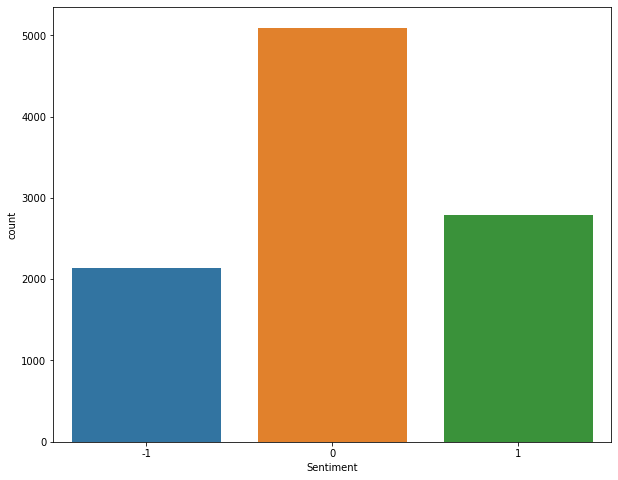

In [82]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.countplot(data = data1, x = 'Sentiment')
plt.show()